In [6]:
try:
   import cPickle as pickle
except:
   import pickle
import newspaper
import re
from gensim.models import doc2vec
import numpy as np
import pandas as pd
from tqdm import *
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline


Run the function definitions at the bottom of the notebook first.

**Load article data**

In [39]:
urls = ['http://cnn.com',
        'http://www.foxnews.com',
       'http://www.breitbart.com/',
        'http://www.time.com',
         'http://www.cnbc.com',
          'http://theatlantic.com',
          'http://www.vice.com']

scrape_publications(urls, maxarticles=0, filename='data.pkl')

building


0it [00:00, ?it/s]

ok


4it [00:01,  1.91it/s]

You must `download()` an article before calling `parse()` on it!
Article 4 not available: http://www.huffingtonpost.com/2016/12/14/its-hard-to-overstate-how-anti-environment-donald-trumps-cabin/?utm_hp_ref=au-homepage


18it [00:18,  1.05it/s]

You must `download()` an article before calling `parse()` on it!
Article 22 not available: http://www.huffingtonpost.com/2016/12/14/the-evolution-of-australian-captain-steve-smith-batting-genius/
You must `download()` an article before calling `parse()` on it!
Article 23 not available: http://www.huffingtonpost.com/2016/12/14/exclusive-aib-is-doing-an-original-series-for-amazon-prime-sta/


26it [00:23,  1.48it/s]

You must `download()` an article before calling `parse()` on it!
Article 32 not available: http://www.huffingtonpost.com/2016/12/14/le-people-francais-le-plus-recherche-en-2016-sur-google-est/?utm_hp_ref=fr-homepage


28it [00:25,  1.08it/s]

You must `download()` an article before calling `parse()` on it!
Article 37 not available: http://www.huffingtonpost.com/2016/12/14/si-estas-horrorizado-por-alepo-aqui-hay-5-maneras-en-las-que-pu/


37it [00:35,  1.36it/s]

You must `download()` an article before calling `parse()` on it!
Article 47 not available: http://www.huffingtonpost.com/2016/12/14/18-feminist-bright-spots-in-the-hellscape-of-2016/?utm_hp_ref=in-homepage


48it [00:43,  1.39it/s]

You must `download()` an article before calling `parse()` on it!
Article 61 not available: http://www.huffingtonpost.com/2016/12/13/alan-thicke-tv-icon-dead-at-69/?utm_hp_ref=au-homepage


49it [00:44,  1.39it/s]

You must `download()` an article before calling `parse()` on it!
Article 64 not available: http://www.huffingtonpost.com/ral-elizalde/cannabis-medicinal-en-mexico-la-reforma-que-llega-tarde/


52it [00:47,  1.14it/s]

You must `download()` an article before calling `parse()` on it!
Article 68 not available: http://www.huffingtonpost.com/2016/12/12/why-demonetisation-was-rolled-out-after-why-raghuram-rajan-left/


55it [00:49,  1.33it/s]

You must `download()` an article before calling `parse()` on it!
Article 73 not available: http://www.huffingtonpost.com/2016/12/13/mumbai-scientists-name-newly-discovered-spider-after-harry-potte/?utm_hp_ref=za-homepage


59it [00:51,  1.74it/s]

You must `download()` an article before calling `parse()` on it!
Article 78 not available: http://www.huffingtonpost.com/2016/12/14/kanye-west-donald-trump-time/


68it [00:56,  2.02it/s]

You must `download()` an article before calling `parse()` on it!
Article 88 not available: http://www.huffingtonpost.com/2016/12/14/ibm-se-adelanta-a-trump-y-anuncia-mas-plazas-laborales-en-eu/?utm_hp_ref=mx-homepage


79it [01:05,  1.45it/s]

You must `download()` an article before calling `parse()` on it!
Article 100 not available: http://www.huffingtonpost.com/2016/12/12/mick-fanning-has-decided-to-save-the-world-one-wave-at-a-time/?utm_hp_ref=au-homepage


80it [01:06,  1.11it/s]

You must `download()` an article before calling `parse()` on it!
Article 105 not available: http://www.huffingtonpost.com/2016/12/14/son-called-out-his-mom-for-lying-on-facebook-and-the-internet-lo/?utm_hp_ref=in-homepage


90it [01:12,  1.67it/s]

You must `download()` an article before calling `parse()` on it!
Article 117 not available: http://www.huffingtonpost.com/2016/12/14/bjp-protested-against-kerala-filmmaker-by-singing/?utm_hp_ref=in-homepage
You must `download()` an article before calling `parse()` on it!
Article 118 not available: http://www.huffingtonpost.com/2016/12/12/the-golden-globe-nominations-are-in-and-la-la-land-leads-the/?utm_hp_ref=in-homepage


97it [01:18,  1.38it/s]

You must `download()` an article before calling `parse()` on it!
Article 127 not available: http://www.huffingtonpost.com/2016/12/13/aleppo-what-you-can-do-to-help/?utm_hp_ref=au-homepage


100it [01:19,  1.86it/s]

You must `download()` an article before calling `parse()` on it!
Article 131 not available: http://www.huffingtonpost.com/2016/12/14/por-primera-vez-brilla-un-pino-en-los-pinos-navidad/?utm_hp_ref=mx-homepage


103it [01:21,  1.89it/s]

You must `download()` an article before calling `parse()` on it!
Article 135 not available: http://www.huffingtonpost.com/2016/12/14/dunkirk-dans-lenfer-de-dunkerque-avec-la-premiere-bande-a/


107it [01:24,  1.23it/s]

You must `download()` an article before calling `parse()` on it!
Article 143 not available: http://www.huffingtonpost.com/2016/12/14/manifestation-alep-syrie-paris-video/


130it [01:37,  1.69it/s]

You must `download()` an article before calling `parse()` on it!
Article 169 not available: http://www.huffingtonpost.com/2016/12/13/guy-carlier-souhaite-a-laurent-wauquiez-un-cancer-du-pancreas-a/


138it [01:42,  1.42it/s]

You must `download()` an article before calling `parse()` on it!
Article 180 not available: http://www.huffingtonpost.com/2016/12/14/cette-appli-qui-connecte-les-seniors-et-ceux-qui-peuvent-faire-l/


141it [01:44,  1.52it/s]

You must `download()` an article before calling `parse()` on it!
Article 184 not available: http://www.huffingtonpost.com/2016/12/14/bruno-mars-estuvo-funktastico-en-el-carpool-de-corden/?utm_hp_ref=mx-homepage
You must `download()` an article before calling `parse()` on it!
Article 185 not available: http://www.huffingtonpost.com/2016/12/14/10-mujeres-que-dieron-de-que-hablar-en-el-2016/?utm_hp_ref=mx-homepage
You must `download()` an article before calling `parse()` on it!
Article 186 not available: http://www.huffingtonpost.com/mondli-zondo/slavery-is-real-and-it-is-still-happening-today/?utm_hp_ref=za-homepage


142it [01:45,  1.27it/s]

You must `download()` an article before calling `parse()` on it!
Article 188 not available: http://www.huffingtonpost.com/judd-lasarow/a-very-good-book-from-red-bulls-former-director/?utm_hp_ref=za-homepage


161it [01:59,  1.80it/s]

You must `download()` an article before calling `parse()` on it!
Article 211 not available: http://www.huffingtonpost.com/2016/12/14/this-holiday-card-is-a-single-lady-s-love-letter-to-pizza/


164it [02:03,  1.15it/s]

You must `download()` an article before calling `parse()` on it!
Article 216 not available: http://www.huffingtonpost.com/2016/12/14/these-aussie-films-will-make-a-splash-at-the-2017-sundance-festi/?utm_hp_ref=au-homepage


170it [02:09,  1.10it/s]

You must `download()` an article before calling `parse()` on it!
Article 225 not available: http://www.huffingtonpost.com/2016/12/13/the-13-most-astounding-revelations-from-the-sabc-inquiry-so-far/?utm_hp_ref=za-homepage
You must `download()` an article before calling `parse()` on it!
Article 226 not available: http://www.huffingtonpost.com/2016/12/14/the-depressing-truth-about-santas-naughty-or-nice-list/


172it [02:11,  1.02s/it]

You must `download()` an article before calling `parse()` on it!
Article 230 not available: http://www.huffingtonpost.com/2016/12/14/7-tips-for-not-losing-your-s-t-over-these-stressful-holidays/?utm_hp_ref=au-homepage
You must `download()` an article before calling `parse()` on it!
Article 231 not available: http://www.huffingtonpost.com/2016/12/13/la-cote-de-popularite-de-francois-hollande-continue-de-monter-s/?utm_hp_ref=fr-homepage
You must `download()` an article before calling `parse()` on it!
Article 232 not available: http://www.huffingtonpost.kr/news/interview


178it [02:23,  1.01it/s]

You must `download()` an article before calling `parse()` on it!
Article 240 not available: http://www.huffingtonpost.com/2016/12/14/tips-for-saving-time-and-stress-in-the-kitchen-this-christmas/


187it [02:30,  1.01it/s]

You must `download()` an article before calling `parse()` on it!
Article 250 not available: http://www.huffingtonpost.com/jodi-botha/how-to-spend-all-day-in-pyjamas/?utm_hp_ref=za-homepage


190it [02:32,  1.14it/s]

You must `download()` an article before calling `parse()` on it!
Article 256 not available: http://www.huffingtonpost.com/2016/12/15/3-killed-15-injured-as-building-collapses-in-mumbais-mankhurd/


192it [02:35,  1.18s/it]

You must `download()` an article before calling `parse()` on it!
Article 259 not available: http://www.huffingtonpost.com/2016/12/14/comfortable-pumps-that-wont-make-you-want-to-rip-your-feet-off/


199it [02:39,  1.75it/s]

You must `download()` an article before calling `parse()` on it!
Article 268 not available: http://www.huffingtonpost.com/2016/12/13/quien-es-antonio-guterres-el-nuevo-secretario-general-de-la-on/?utm_hp_ref=mx-homepage


213it [02:58,  1.27s/it]

You must `download()` an article before calling `parse()` on it!
Article 289 not available: http://www.huffingtonpost.com/2016/12/14/brebis-tuileries-paris-loup-animaux-photos/?utm_hp_ref=fr-homepage


225it [03:07,  1.61it/s]

You must `download()` an article before calling `parse()` on it!
Article 303 not available: http://www.huffingtonpost.com/2016/12/14/colossal-wave-rolls-through-north-atlantic-shattering-previous/?utm_hp_ref=in-homepage


229it [03:09,  2.08it/s]

You must `download()` an article before calling `parse()` on it!
Article 308 not available: http://www.huffingtonpost.com/2016/12/14/pink-devoile-son-joli-ventre-rond-seins-nus/


243it [03:18,  1.84it/s]

You must `download()` an article before calling `parse()` on it!
Article 324 not available: http://www.huffingtonpost.com/2016/12/14/cyclone-vardah-is-to-blame-for-your-slow-internet/


249it [03:26,  1.10it/s]

You must `download()` an article before calling `parse()` on it!
Article 332 not available: http://www.huffingtonpost.com/2016/12/15/ouverture-de-lascaux-4-visiter-des-repliques-lavenir-du-tou/?utm_hp_ref=fr-homepage
You must `download()` an article before calling `parse()` on it!
Article 333 not available: http://www.huffingtonpost.com/2016/12/14/amazon-prime-video-le-catalogue-france-decouvrez-les-films-le/?utm_hp_ref=fr-homepage


257it [03:34,  1.35it/s]

You must `download()` an article before calling `parse()` on it!
Article 343 not available: http://www.huffingtonpost.com/2016/12/12/dormir-dos-horas-menos-cuadruplica-tus-posibilidades-de-chocar/?utm_hp_ref=mx-homepage


283it [03:51,  1.57it/s]

You must `download()` an article before calling `parse()` on it!
Article 370 not available: http://www.huffingtonpost.com/2016/11/30/the-way-demonetisation-is-playing-out-some-clear-winners-and-lo/
You must `download()` an article before calling `parse()` on it!
Article 371 not available: http://www.huffingtonpost.com/2016/12/13/google-quiere-conquistar-cuba-con-internet-mas-rapido/?utm_hp_ref=mx-homepage
You must `download()` an article before calling `parse()` on it!
Article 372 not available: http://www.huffingtonpost.com/2016/12/14/19-nonfiction-books-from-2016-that-will-expand-your-mind/


286it [03:53,  1.56it/s]

You must `download()` an article before calling `parse()` on it!
Article 376 not available: http://www.huffingtonpost.com/2016/12/13/9-beauty-trends-de-pinterest-para-2017/


291it [03:56,  2.07it/s]

You must `download()` an article before calling `parse()` on it!
Article 382 not available: http://www.huffingtonpost.com/2016/12/12/i-have-seen-more-sexism-in-bollywood-than-in-the-porn-industry/?utm_hp_ref=in-homepage
You must `download()` an article before calling `parse()` on it!
Article 383 not available: http://www.huffingtonpost.com/2016/12/13/video-esto-nos-conto-ximena-sarinana-a-bordo-del-barco-de-green/?utm_hp_ref=mx-homepage


318it [04:21,  1.45s/it]

You must `download()` an article before calling `parse()` on it!
Article 418 not available: http://www.huffingtonpost.com/2016/12/14/patrick-kanner-chant-lyrique-opera-roberto-alagna/?utm_hp_ref=fr-homepage


325it [04:29,  1.41s/it]

You must `download()` an article before calling `parse()` on it!
Article 428 not available: http://www.huffingtonpost.com/2016/12/14/vincent-cassel-sest-debarrasse-de-sa-grosse-barbe/?utm_hp_ref=fr-homepage


330it [04:33,  1.19it/s]

You must `download()` an article before calling `parse()` on it!
Article 435 not available: http://www.huffingtonpost.com/2016/12/14/alan-thicke-l-acteur-de-quoi-de-neuf-docteur-est-mort/
You must `download()` an article before calling `parse()` on it!
Article 436 not available: http://www.huffingtonpost.com/2016/12/13/pourquoi-jean-marc-ayrault-a-felicite-jean-marc-ayrault-penda/?utm_hp_ref=fr-homepage


344it [04:53,  1.07it/s]

You must `download()` an article before calling `parse()` on it!
Article 451 not available: http://www.huffingtonpost.com/frederic-lapraz/frederic-lapraz/rentree-vacances-de-noel-3-janvier/


346it [04:56,  1.12s/it]

You must `download()` an article before calling `parse()` on it!
Article 455 not available: http://www.huffingtonpost.com/2016/12/12/will-babas-love-conquer-all-once-again-for-hlaudi/?utm_hp_ref=za-homepage


347it [04:58,  1.34s/it]

You must `download()` an article before calling `parse()` on it!
Article 457 not available: http://www.huffingtonpost.com/js-smit/js-smit/top-holiday-parenting-tips-from-a-non-parent/?utm_hp_ref=za-homepage


350it [05:01,  1.07s/it]

You must `download()` an article before calling `parse()` on it!
Article 462 not available: http://www.huffingtonpost.com/2016/12/14/humans-are-totally-unprepared-for-potential-asteroid-strike-nas/?utm_hp_ref=au-homepage
You must `download()` an article before calling `parse()` on it!
Article 463 not available: http://www.huffingtonpost.com/liv-hamilton/what-my-dad-taught-me-about-crazy-stupid-love/?utm_hp_ref=au-homepage
You must `download()` an article before calling `parse()` on it!
Article 464 not available: http://www.huffingtonpost.com/2016/12/14/the-morning-wrap-pm-modi-among-top-10-most-powerful-people-in-t/?utm_hp_ref=in-homepage


364it [05:12,  1.70it/s]

You must `download()` an article before calling `parse()` on it!
Article 482 not available: http://www.huffingtonpost.com/amy-siskind/por-que-hay-mujeres-que-se-odian-tanto-entre-si/


366it [05:14,  1.43it/s]

You must `download()` an article before calling `parse()` on it!
Article 485 not available: http://www.huffingtonpost.com/2016/12/13/read-amber-heards-powerful-letter-to-silent-sisters-of-domestic-violence/?utm_hp_ref=au-homepage


369it [05:15,  1.60it/s]

You must `download()` an article before calling `parse()` on it!
Article 489 not available: http://www.huffingtonpost.com/2016/12/13/jennifer-lawrence-se-vengo-de-las-bromas-de-chris-pratt-asi/?utm_hp_ref=mx-homepage


371it [05:17,  1.32it/s]

You must `download()` an article before calling `parse()` on it!
Article 493 not available: http://www.huffingtonpost.com/2016/12/14/video-mitos-sobre-el-sueno/
You must `download()` an article before calling `parse()` on it!
Article 494 not available: http://www.huffingtonpost.com/2016/12/14/cette-poignee-de-main-entre-le-president-camerounais-et-un-minis/?utm_hp_ref=fr-homepage
You must `download()` an article before calling `parse()` on it!
Article 495 not available: http://www.huffingtonpost.com/2016/12/14/betsy-pecanins-tendra-homenaje-en-el-teatro-de-la-ciudad/?utm_hp_ref=mx-homepage
You must `download()` an article before calling `parse()` on it!
Article 496 not available: http://www.huffingtonpost.com/juan-manuel-ardavin/como-proteger-a-tus-rinones-de-los-efectos-toxicos-de-medicament/?utm_hp_ref=mx-homepage


372it [05:19,  1.07it/s]

You must `download()` an article before calling `parse()` on it!
Article 498 not available: http://www.huffingtonpost.com/frederic-lapraz/frederic-lapraz/rentree-vacances-de-noel-3-janvier/?utm_hp_ref=fr-homepage


374it [05:21,  1.03it/s]

You must `download()` an article before calling `parse()` on it!
Article 501 not available: http://www.huffingtonpost.com/2016/12/14/alan-thicke-tv-icon-and-robin-thickes-dad-dead-at-69/?utm_hp_ref=za-homepage


375it [05:21,  1.09it/s]

You must `download()` an article before calling `parse()` on it!
Article 503 not available: http://www.huffingtonpost.com/2016/12/14/whats-going-on-with-kanye-west-anyway/?utm_hp_ref=za-homepage


379it [05:24,  1.42it/s]

You must `download()` an article before calling `parse()` on it!
Article 509 not available: http://www.huffingtonpost.com/2016/12/14/pets-can-be-life-changing-for-people-living-with-severe-mental-i/?utm_hp_ref=au-homepage


380it [05:25,  1.56it/s]

You must `download()` an article before calling `parse()` on it!
Article 511 not available: http://www.huffingtonpost.com/2016/12/13/people-googled-where-is-new-south-wales-this-year/?utm_hp_ref=au-homepage


383it [05:26,  1.82it/s]

You must `download()` an article before calling `parse()` on it!
Article 516 not available: http://www.huffingtonpost.com/2016/12/14/la-question-qui-fache-du-huffpost-au-patron-de-la-cfdt-sur-franc/?utm_hp_ref=fr-homepage


388it [05:32,  1.04it/s]

You must `download()` an article before calling `parse()` on it!
Article 522 not available: http://www.huffingtonpost.com/2016/12/14/colossal-wave-rolls-through-north-atlantic-shattering-previous/


399it [05:39,  1.40it/s]

You must `download()` an article before calling `parse()` on it!
Article 536 not available: http://www.huffingtonpost.com/2016/12/14/incredible-study-shows-cuddling-preemies-helps-them-for-decades/?utm_hp_ref=au-homepage


400it [05:40,  1.52it/s]

You must `download()` an article before calling `parse()` on it!
Article 539 not available: http://www.huffingtonpost.com/2016/12/14/ce-tweet-signe-t-il-la-fin-de-la-guerre-entre-lady-gaga-et-madon/


407it [05:45,  1.48it/s]

You must `download()` an article before calling `parse()` on it!
Article 547 not available: http://www.huffingtonpost.com/2016/12/14/10-mujeres-que-dieron-de-que-hablar-en-el-2016/


411it [05:48,  1.57it/s]

You must `download()` an article before calling `parse()` on it!
Article 555 not available: http://www.huffingtonpost.com/news/bwh/


413it [05:52,  1.30s/it]

You must `download()` an article before calling `parse()` on it!
Article 559 not available: http://www.huffingtonpost.com/2016/12/14/ibm-se-adelanta-a-trump-y-anuncia-mas-plazas-laborales-en-eu/


422it [05:56,  2.27it/s]

You must `download()` an article before calling `parse()` on it!
Article 570 not available: http://www.huffingtonpost.com/2016/12/14/silly-season-affecting-your-sleep-lets-talk-about-the-damage/?utm_hp_ref=au-homepage


423it [05:57,  1.50it/s]

You must `download()` an article before calling `parse()` on it!
Article 572 not available: http://www.huffingtonpost.com/2016/12/14/if-youre-horrified-by-events-in-aleppo-here-are-8-charities-th/?utm_hp_ref=za-homepage


426it [05:59,  1.68it/s]

You must `download()` an article before calling `parse()` on it!
Article 576 not available: http://www.huffingtonpost.com/astrid-guyart/bienfaits-sport-entreprise-bureau-bien-etre/?utm_hp_ref=fr-homepage


433it [06:05,  1.09s/it]

You must `download()` an article before calling `parse()` on it!
Article 586 not available: http://www.huffingtonpost.com/2016/12/12/asi-sabras-que-la-bolsa-que-te-regalaron-en-navidad-no-es-un-clo/?utm_hp_ref=mx-homepage


435it [06:06,  1.31it/s]

You must `download()` an article before calling `parse()` on it!
Article 589 not available: http://www.huffingtonpost.com/2016/12/12/syrians-are-posting-heartbreaking-messages-as-aleppo-is-seized/?utm_hp_ref=au-homepage


439it [06:09,  1.73it/s]

You must `download()` an article before calling `parse()` on it!
Article 594 not available: http://www.huffingtonpost.com/juan-manuel-ardavin/como-proteger-a-tus-rinones-de-los-efectos-toxicos-de-medicament/


445it [06:13,  1.42it/s]

You must `download()` an article before calling `parse()` on it!
Article 602 not available: http://www.huffingtonpost.com/2016/12/14/rahul-gandhi-to-hit-the-streets-on-note-ban-highlight-public-pa/?utm_hp_ref=in-homepage


446it [06:14,  1.43it/s]

You must `download()` an article before calling `parse()` on it!
Article 604 not available: http://www.huffingtonpost.com/2016/12/14/no-evidence-depressed-people-are-rorting-pensions-or-drug-a/


449it [06:15,  2.17it/s]

You must `download()` an article before calling `parse()` on it!
Article 608 not available: http://www.huffingtonpost.com/2016/12/14/alan-thicke-l-acteur-de-quoi-de-neuf-docteur-est-mort/?utm_hp_ref=fr-homepage


451it [06:18,  1.08s/it]

You must `download()` an article before calling `parse()` on it!
Article 612 not available: http://www.huffingtonpost.com/2016/12/13/if-you-missed-that-awkward-usman-khawaja-moment-um-yeah/


463it [06:30,  1.61it/s]

You must `download()` an article before calling `parse()` on it!
Article 628 not available: http://www.huffingtonpost.com/2016/12/13/lo-que-realmente-opinan-los-polinesios-sobre-moana/?utm_hp_ref=mx-homepage


464it [06:34,  1.73s/it]

You must `download()` an article before calling `parse()` on it!
Article 630 not available: http://www.huffingtonpost.com/2016/12/13/man-charged-with-attempted-murder-and-sexual-assault-of-a-girl/?utm_hp_ref=au-homepage
You must `download()` an article before calling `parse()` on it!
Article 631 not available: http://www.huffingtonpost.com/2016/12/14/amazon-lance-prime-video-en-france-et-declare-la-guerre-a-netf/?utm_hp_ref=fr-homepage


466it [06:36,  1.24s/it]

You must `download()` an article before calling `parse()` on it!
Article 635 not available: http://www.huffingtonpost.com/2016/12/13/kanye-west-meets-with-donald-trump-talks-about-life/?utm_hp_ref=au-homepage


472it [06:39,  1.71it/s]

You must `download()` an article before calling `parse()` on it!
Article 642 not available: http://www.huffingtonpost.com/2016/12/14/report-says-putin-was-directly-involved-with-russian-interferenc/


473it [06:40,  1.25it/s]

You must `download()` an article before calling `parse()` on it!
Article 645 not available: http://www.huffingtonpost.com/erubiel-tirado/veracruz-y-la-decadencia-politica-en-mexico/?utm_hp_ref=mx-homepage


477it [06:44,  1.16it/s]

You must `download()` an article before calling `parse()` on it!
Article 651 not available: http://www.huffingtonpost.com/2016/12/14/los-mensajes-mas-desgarradores-de-los-sirios-en-alepo/


480it [06:53,  2.68s/it]

You must `download()` an article before calling `parse()` on it!
Article 657 not available: http://www.huffingtonpost.com/2016/12/14/lo-que-no-sabias-de-el-principito/?utm_hp_ref=mx-homepage


485it [06:57,  1.15s/it]

You must `download()` an article before calling `parse()` on it!
Article 665 not available: http://www.huffingtonpost.com/2016/12/13/le-mariage-suspect-la-nouvelle-affaire-qui-eclabousse-les-bal/?utm_hp_ref=fr-homepage


493it [07:02,  1.61it/s]

You must `download()` an article before calling `parse()` on it!
Article 674 not available: http://www.huffingtonpost.com/2016/12/14/letrange-reponse-de-cet-acteur-star-d-esprit-criminel-quand-o/?utm_hp_ref=fr-homepage


496it [07:05,  1.33it/s]

You must `download()` an article before calling `parse()` on it!
Article 679 not available: http://www.huffingtonpost.com/2016/12/13/caos-en-venezuela-por-la-salida-de-circulacion-de-billetes-de-10/?utm_hp_ref=mx-homepage
You must `download()` an article before calling `parse()` on it!
Article 680 not available: http://www.huffingtonpost.com/2016/12/02/la-decada-perdida-de-las-fuerzas-armadas-en-la-guerra-contra-el/?utm_hp_ref=mx-homepage


497it [07:05,  1.47it/s]

You must `download()` an article before calling `parse()` on it!
Article 682 not available: http://www.huffingtonpost.com/2016/12/14/crime-patrol-actor-kamlesh-pandey-shoots-himself-dead-at-famil/


501it [07:08,  1.79it/s]

You must `download()` an article before calling `parse()` on it!
Article 687 not available: http://www.huffingtonpost.com/2016/12/14/19-nonfiction-books-from-2016-that-will-expand-your-mind/?utm_hp_ref=au-homepage


506it [07:11,  1.67it/s]

You must `download()` an article before calling `parse()` on it!
Article 694 not available: http://www.huffingtonpost.com/2016/12/14/les-acteurs-de-rogue-one-sur-leur-31-pour-la-premiere-europeen/?utm_hp_ref=fr-homepage


510it [07:17,  1.70s/it]

You must `download()` an article before calling `parse()` on it!
Article 699 not available: http://www.huffingtonpost.com/2016/12/14/la-video-choc-sur-la-pollution-aux-particules-fines-tournee-dans/?utm_hp_ref=fr-homepage


513it [07:19,  1.06it/s]

You must `download()` an article before calling `parse()` on it!
Article 703 not available: http://www.huffingtonpost.com/joanna-marshall/this-is-what-happens-after-you-drop-your-child-at-daycare/
You must `download()` an article before calling `parse()` on it!
Article 704 not available: http://www.huffingtonpost.com/2016/12/13/the-nbn-just-got-that-little-bit-more-expensive-again/?utm_hp_ref=au-homepage


518it [07:22,  1.48it/s]

You must `download()` an article before calling `parse()` on it!
Article 710 not available: http://www.huffingtonpost.com/2016/12/14/bronwyn-bishop-says-many-with-depression-are-rorting-pension/


528it [07:30,  1.84it/s]

You must `download()` an article before calling `parse()` on it!
Article 722 not available: http://www.huffingtonpost.com/rashmi-pandit/photoblog-the-evocative-empty-tombs-of-rajasthan/?utm_hp_ref=in-homepage
You must `download()` an article before calling `parse()` on it!
Article 725 not available: http://www.huffingtonpost.com/2016/12/14/confusion-autour-de-levacuation-des-civils-a-alep/?utm_hp_ref=fr-homepage


530it [07:32,  1.20it/s]

You must `download()` an article before calling `parse()` on it!
Article 729 not available: http://www.huffingtonpost.com/2016/12/14/this-customers-exchange-with-the-zomato-customer-care-executive/?utm_hp_ref=in-homepage
You must `download()` an article before calling `parse()` on it!
Article 730 not available: http://www.huffingtonpost.com/2016/12/13/colegio-electoral-exige-resolucion-sobre-posible-hackeo-ruso-ant/


531it [07:33,  1.28it/s]

You must `download()` an article before calling `parse()` on it!
Article 732 not available: http://www.huffingtonpost.com/2016/11/13/almost-everything-that-people-think-they-know-about-the-kohinoor/


532it [07:34,  1.26it/s]

You must `download()` an article before calling `parse()` on it!
Article 734 not available: http://www.huffingtonpost.com/2016/12/13/7-opening-conversations-on-tinder-that-men-should-totally-avoid/?utm_hp_ref=in-homepage


538it [07:39,  1.16it/s]

You must `download()` an article before calling `parse()` on it!
Article 742 not available: http://www.huffingtonpost.com/2016/12/13/battle-for-aleppo-ends-as-rebels-agree-to-ceasefire/?utm_hp_ref=au-homepage


543it [07:43,  1.55it/s]

You must `download()` an article before calling `parse()` on it!
Article 748 not available: http://www.huffingtonpost.com/2016/12/14/domestic-black-money-used-in-economy-and-productive-doval-once/?utm_hp_ref=in-homepage


544it [07:43,  1.57it/s]

You must `download()` an article before calling `parse()` on it!
Article 750 not available: http://www.huffingtonpost.com/2016/12/14/exclusif-arnaud-montebourg-doit-plus-de-30-000-euros-au-ps/?utm_hp_ref=fr-homepage
You must `download()` an article before calling `parse()` on it!
Article 751 not available: http://www.huffingtonpost.com/2016/12/13/this-indian-womans-viral-facebook-post-answers-all-the-question/?utm_hp_ref=in-homepage


549it [07:51,  1.28s/it]

You must `download()` an article before calling `parse()` on it!
Article 758 not available: http://www.huffingtonpost.com/2016/12/14/patrick-kanner-chant-lyrique-opera-roberto-alagna/


552it [07:56,  1.24s/it]

You must `download()` an article before calling `parse()` on it!
Article 762 not available: http://www.huffingtonpost.com/2016/12/14/jackie-evancho-hymne-americain-donald-trump/?utm_hp_ref=fr-homepage
You must `download()` an article before calling `parse()` on it!
Article 763 not available: http://www.huffingtonpost.com/2016/12/14/yahoo-hack-hit-a-more-than-1-billion-accounts/?utm_hp_ref=au-homepage


559it [08:03,  1.53s/it]

You must `download()` an article before calling `parse()` on it!
Article 771 not available: http://www.huffingtonpost.com/2016/12/14/il-ny-aura-pas-de-grand-stade-pour-l-quipe-de-france-de-rugb/?utm_hp_ref=fr-homepage


564it [08:07,  1.27it/s]

You must `download()` an article before calling `parse()` on it!
Article 779 not available: http://www.huffingtonpost.com/2016/12/12/la-riqueza-del-gabinete-de-trump-podria-ser-mayor-al-pib-de-boli/?utm_hp_ref=mx-homepage
You must `download()` an article before calling `parse()` on it!
Article 780 not available: http://www.huffingtonpost.com/pardeep-goyal/how-i-recovered-from-my-startup-failures/?utm_hp_ref=in-homepage


566it [08:08,  1.33it/s]

You must `download()` an article before calling `parse()` on it!
Article 783 not available: http://www.huffingtonpost.com/2016/12/14/la-soiree-dhalloween-ou-personne-na-juge-ce-grand-brule-sur-so/?utm_hp_ref=fr-homepage


567it [08:09,  1.33it/s]

You must `download()` an article before calling `parse()` on it!
Article 785 not available: http://www.huffingtonpost.com/2016/12/15/darnaud-montebourg-a-michel-platini-qui-est-thomas-clay-larb/


570it [08:11,  1.50it/s]

You must `download()` an article before calling `parse()` on it!
Article 789 not available: http://www.huffingtonpost.com/2016/12/14/elle-publie-une-formidable-lettre-ouverte-sur-facebook-a-celui-q/?utm_hp_ref=fr-homepage


578it [08:21,  2.11s/it]

You must `download()` an article before calling `parse()` on it!
Article 799 not available: http://www.huffingtonpost.com/2016/12/14/grandes-tecnologicas-tendran-que-defender-sus-inversiones-en-mex/


585it [08:35,  1.71s/it]

You must `download()` an article before calling `parse()` on it!
Article 809 not available: http://www.huffingtonpost.com/2016/12/14/jihadiste-ayoub-el-khazzani-attaque-thalys/?utm_hp_ref=fr-homepage


590it [08:40,  1.10s/it]

You must `download()` an article before calling `parse()` on it!
Article 816 not available: http://www.huffingtonpost.com/2016/12/14/un-simple-typo-permitio-el-hackeo-de-los-correos-del-director-de/?utm_hp_ref=mx-homepage


591it [08:41,  1.00it/s]

You must `download()` an article before calling `parse()` on it!
Article 818 not available: http://www.huffingtonpost.com/nayeli-garca/premios-cdmx-aplausos-para-la-mejor-forma-de-protestar/
You must `download()` an article before calling `parse()` on it!
Article 819 not available: http://www.huffingtonpost.com/zomato/you-dont-need-500-to-get-tanked-at-these-pocket-friendly-bars/?utm_hp_ref=in-homepage


605it [08:51,  1.63it/s]

You must `download()` an article before calling `parse()` on it!
Article 838 not available: http://www.huffingtonpost.com/2016/12/14/stephane-richard-ex-dircab-de-lagarde-et-pdg-dorange-grand-ab/?utm_hp_ref=fr-homepage


606it [08:52,  1.68it/s]

You must `download()` an article before calling `parse()` on it!
Article 840 not available: http://www.huffingtonpost.com/2016/12/14/far-too-many-fashion-magazines-only-used-white-cover-models-in-2/


607it [08:53,  1.17it/s]

You must `download()` an article before calling `parse()` on it!
Article 842 not available: http://www.huffingtonpost.com/2016/12/13/rbi-asks-banks-to-preserve-cctv-footages-to-spot-currency-hoarde/?utm_hp_ref=in-homepage


611it [08:56,  1.15it/s]

You must `download()` an article before calling `parse()` on it!
Article 847 not available: http://www.huffingtonpost.com/2016/12/14/christine-bravo-aurait-aime-que-cette-sequence-soit-coupee-au-mo/?utm_hp_ref=fr-homepage


617it [09:00,  1.40it/s]

You must `download()` an article before calling `parse()` on it!
Article 855 not available: http://www.huffingtonpost.com/2016/12/13/people-are-sharing-this-stunning-photograph-of-pluto-that-made/?utm_hp_ref=za-homepage


627it [09:08,  1.63it/s]

You must `download()` an article before calling `parse()` on it!
Article 867 not available: http://www.huffingtonpost.com/2016/12/14/francois-fillon-invite-surprise-de-la-preselection-du-prix-de-l/?utm_hp_ref=fr-homepage


628it [09:10,  1.10it/s]

You must `download()` an article before calling `parse()` on it!
Article 869 not available: http://www.huffingtonpost.com/2016/12/14/el-posible-plan-malefico-de-starbucks-en-cada-nombre-mal-escrito/?utm_hp_ref=mx-homepage
You must `download()` an article before calling `parse()` on it!
Article 870 not available: http://www.huffingtonpost.com/2016/12/14/hindus-least-educated-religious-group-in-the-world-pew-survey/


647it [09:21,  1.63it/s]

You must `download()` an article before calling `parse()` on it!
Article 893 not available: http://www.huffingtonpost.com/2016/12/14/this-family-set-up-a-go-fund-me-page-for-their-dying-dog/?utm_hp_ref=au-homepage
You must `download()` an article before calling `parse()` on it!
Article 894 not available: http://www.huffingtonpost.com/2016/12/14/the-pakistan-australia-cricket-trophy-is-bloody-weird/?utm_hp_ref=au-homepage
You must `download()` an article before calling `parse()` on it!
Article 895 not available: http://www.huffingtonpost.com/2016/12/13/stephen-colbert-grills-donald-trump-over-russian-hacking-in-spoof/?utm_hp_ref=au-homepage


657it [09:30,  1.04it/s]

You must `download()` an article before calling `parse()` on it!
Article 908 not available: http://www.huffingtonpost.com/2016/12/14/amazon-prime-video-whats-on-offer-what-is-the-pricing-and-wha/?utm_hp_ref=in-homepage


661it [09:31,  1.95it/s]

You must `download()` an article before calling `parse()` on it!
Article 913 not available: http://www.huffingtonpost.com/2016/12/12/proxima-parada-oslo/?utm_hp_ref=mx-homepage


664it [09:33,  1.98it/s]

You must `download()` an article before calling `parse()` on it!
Article 917 not available: http://www.huffingtonpost.com/2016/11/25/el-dolar-caro-pone-en-aprietos-a-comercios-de-la-frontera-de-eu/?utm_hp_ref=mx-homepage


675it [09:40,  1.93it/s]

You must `download()` an article before calling `parse()` on it!
Article 929 not available: http://www.huffingtonpost.com/2016/12/14/jet-airways-files-civil-defamation-suit-against-investigative-jo/


677it [09:41,  2.07it/s]

You must `download()` an article before calling `parse()` on it!
Article 933 not available: http://www.huffingtonpost.com/nayeli-garca/premios-cdmx-aplausos-para-la-mejor-forma-de-protestar/?utm_hp_ref=mx-homepage


678it [09:42,  1.67it/s]

You must `download()` an article before calling `parse()` on it!
Article 935 not available: http://www.huffingtonpost.com/2016/12/14/criminal-minds-star-responds-to-gay-rumors-with-a-challenge/?utm_hp_ref=au-homepage


683it [09:46,  1.10it/s]

You must `download()` an article before calling `parse()` on it!
Article 943 not available: http://www.huffingtonpost.com/2016/12/14/more-people-googled-modi-after-demonetisation-than-when-he-won-t/?utm_hp_ref=in-homepage


686it [09:48,  1.25it/s]

You must `download()` an article before calling `parse()` on it!
Article 947 not available: http://www.huffingtonpost.com/2016/12/14/former-nsw-politician-eddie-obeid-sentenced-to-three-years-in-pr/?utm_hp_ref=au-homepage


696it [09:56,  1.45it/s]

You must `download()` an article before calling `parse()` on it!
Article 960 not available: http://www.huffingtonpost.com/2016/12/14/why-doesnt-rahul-gandhi-reveal-information-about-pm-modi-asks/?utm_hp_ref=in-homepage
You must `download()` an article before calling `parse()` on it!
Article 961 not available: http://www.huffingtonpost.com/2016/12/13/10-mensajes-de-mujeres-que-apoyan-a-ana-gabriela-guevara/?utm_hp_ref=mx-homepage


697it [09:57,  1.52it/s]

You must `download()` an article before calling `parse()` on it!
Article 963 not available: http://www.huffingtonpost.com/2016/12/14/heres-why-michael-moore-thinks-donald-trump-is-gonna-get-us-ki/?utm_hp_ref=au-homepage


700it [09:59,  1.44it/s]

You must `download()` an article before calling `parse()` on it!
Article 968 not available: http://www.huffingtonpost.com/2016/12/14/bernie-sanders-shows-a-trump-voter-how-they-actually-see-eye-to/?utm_hp_ref=au-homepage


703it [10:01,  1.84it/s]

You must `download()` an article before calling `parse()` on it!
Article 972 not available: http://www.huffingtonpost.com/2016/12/13/beyond-the-politics-how-should-we-remember-jayalalithaa-as-an-a/?utm_hp_ref=in-homepage


713it [10:08,  1.13it/s]

You must `download()` an article before calling `parse()` on it!
Article 984 not available: http://www.huffingtonpost.com/2016/12/14/rahul-gandhis-corruption-accusation-against-pm-modi-signals-a-b/?utm_hp_ref=in-homepage


717it [10:11,  1.33it/s]

You must `download()` an article before calling `parse()` on it!
Article 989 not available: http://www.huffingtonpost.com/2016/12/14/the-pakistan-australia-cricket-trophy-is-bloody-weird/


732it [10:27,  1.20it/s]

You must `download()` an article before calling `parse()` on it!
Article 1006 not available: http://www.huffingtonpost.com/2016/12/14/resurgen-enfrentamientos-por-ayotzinapa-video/


744it [10:36,  1.57it/s]

You must `download()` an article before calling `parse()` on it!
Article 1020 not available: http://www.huffingtonpost.com/2016/12/14/the-anc-needs-to-foot-the-bill-for-the-sabcs-implosion/?utm_hp_ref=za-homepage


750it [10:41,  1.02it/s]

You must `download()` an article before calling `parse()` on it!
Article 1028 not available: http://www.huffingtonpost.com/deprose-muchena/from-angola-to-zimbabwe-human-rights-are-under-attack/?utm_hp_ref=za-homepage


752it [10:43,  1.19it/s]

You must `download()` an article before calling `parse()` on it!
Article 1031 not available: http://www.huffingtonpost.com/simone-armstrong/what-to-do-if-you-dont-get-the-hsc-result-you-were-after/?utm_hp_ref=au-homepage


753it [10:44,  1.01s/it]

You must `download()` an article before calling `parse()` on it!
Article 1033 not available: http://www.huffingtonpost.com/2016/12/09/la-gente-le-pide-que-vuelva-moreira-ira-por-diputacion-local/?utm_hp_ref=mx-homepage
You must `download()` an article before calling `parse()` on it!
Article 1034 not available: http://www.huffingtonpost.com/2016/12/13/al-borde-de-la-derrota-acuerdan-que-rebeldes-sirios-abandonen-e/?utm_hp_ref=mx-homepage


759it [10:48,  1.93it/s]

You must `download()` an article before calling `parse()` on it!
Article 1041 not available: http://www.huffingtonpost.com/2016/12/14/donald-trump-sest-mis-dans-la-poche-les-patrons-de-tesla-et-ube/?utm_hp_ref=fr-homepage


765it [10:52,  1.05it/s]

You must `download()` an article before calling `parse()` on it!
Article 1048 not available: http://www.huffingtonpost.com/2016/12/12/ana-gabriela-guevara-sufre-accidente-en-motocicleta/?utm_hp_ref=mx-homepage


772it [10:59,  1.37it/s]

You must `download()` an article before calling `parse()` on it!
Article 1058 not available: http://www.huffingtonpost.com/erin-schrode/la-reunion-de-ivanka-y-al-gore-pura-cortina-de-humo/?utm_hp_ref=mx-homepage


773it [10:59,  1.60it/s]

You must `download()` an article before calling `parse()` on it!
Article 1060 not available: http://www.huffingtonpost.com/audiomatic/podcast-a-meeting-of-minds-is-what-citizen-science-is-all-about/?utm_hp_ref=in-homepage


778it [11:02,  1.73it/s]

You must `download()` an article before calling `parse()` on it!
Article 1066 not available: http://www.huffingtonpost.com/susan-narjala/a-whiff-of-christmas-in-prague/?utm_hp_ref=in-homepage


785it [11:08,  1.43it/s]

You must `download()` an article before calling `parse()` on it!
Article 1075 not available: http://www.huffingtonpost.com/2016/12/14/peter-dutton-wants-you-to-save-christmas-from-political-correct/
You must `download()` an article before calling `parse()` on it!
Article 1076 not available: http://www.huffingtonpost.com/2016/12/13/golden-globe-nominations-2017-highlights-la-la-land-moonligh/?utm_hp_ref=au-homepage


787it [11:11,  1.04s/it]

You must `download()` an article before calling `parse()` on it!
Article 1080 not available: http://www.huffingtonpost.com/2016/12/14/los-mensajes-mas-desgarradores-de-los-sirios-en-alepo/?utm_hp_ref=mx-homepage


792it [11:14,  1.19it/s]

You must `download()` an article before calling `parse()` on it!
Article 1087 not available: http://www.huffingtonpost.com/2016/12/14/kanye-west-donald-trump-time/?utm_hp_ref=fr-homepage


798it [11:18,  1.57it/s]

You must `download()` an article before calling `parse()` on it!
Article 1095 not available: http://www.huffingtonpost.com/2016/12/15/delhi-high-court-lawyer-caught-on-video-thrashing-daughter-and-w/
You must `download()` an article before calling `parse()` on it!
Article 1096 not available: http://www.huffingtonpost.com/2016/12/13/quanitco-actress-priyanka-chopra-appointed-as-unicefs-global/?utm_hp_ref=za-homepage


805it [11:22,  1.51it/s]

You must `download()` an article before calling `parse()` on it!
Article 1104 not available: http://www.huffingtonpost.com/2016/12/14/il-y-aura-bien-une-femme-a-la-primaire-du-ps-ce-sera-sylvia-pin/


821it [11:37,  1.30it/s]

You must `download()` an article before calling `parse()` on it!
Article 1122 not available: http://www.huffingtonpost.com/2016/12/13/jennifer-lawrence-and-chris-pratt-are-in-a-league-of-their-own-when-it-comes-to-insults/?utm_hp_ref=au-homepage


823it [11:40,  1.05s/it]

You must `download()` an article before calling `parse()` on it!
Article 1125 not available: http://www.huffingtonpost.com/2016/12/13/an-all-female-dc-villains-movie-starring-margot-robbie-is-actual/?utm_hp_ref=au-homepage


826it [11:43,  1.08s/it]

You must `download()` an article before calling `parse()` on it!
Article 1131 not available: http://www.huffingtonpost.com/2016/12/15/white-students-hold-trump-sign-turn-backs-on-black-basketball/?utm_hp_ref=za-homepage
You must `download()` an article before calling `parse()` on it!
Article 1132 not available: http://www.huffingtonpost.com/2016/12/13/a-alep-les-forces-de-bachar-al-assad-massacrent-les-civils/?utm_hp_ref=fr-homepage


828it [11:45,  1.09s/it]

You must `download()` an article before calling `parse()` on it!
Article 1136 not available: http://www.huffingtonpost.com/2016/12/13/el-futuro-secretario-de-estado-de-trump-queria-integrar-a-mexico/?utm_hp_ref=mx-homepage


834it [11:51,  1.29it/s]

You must `download()` an article before calling `parse()` on it!
Article 1144 not available: http://www.huffingtonpost.com/latest-sightings/lions-attack-and-kills-hyena-cub-at-den/?utm_hp_ref=za-homepage


841it [11:55,  1.40it/s]

You must `download()` an article before calling `parse()` on it!
Article 1152 not available: http://www.huffingtonpost.com/2016/12/13/dylan-voller-set-up-to-fail-by-juvenile-detention-system-case/?utm_hp_ref=au-homepage
You must `download()` an article before calling `parse()` on it!
Article 1153 not available: http://www.huffingtonpost.com/doctors-without-borders/east-aleppo-you-cant-do-much-to-prepare-for-bombardment-like/?utm_hp_ref=za-homepage
You must `download()` an article before calling `parse()` on it!
Article 1154 not available: http://www.huffingtonpost.com/2016/12/14/why-are-there-no-rich-people-in-bank-queues-ask-vendors-labour/?utm_hp_ref=in-homepage


846it [12:00,  1.21it/s]

You must `download()` an article before calling `parse()` on it!
Article 1160 not available: http://www.huffingtonpost.com/2016/12/13/priyanka-chopra-appointed-as-unicefs-global-goodwill-ambassador/?utm_hp_ref=in-homepage
You must `download()` an article before calling `parse()` on it!
Article 1161 not available: http://www.huffingtonpost.com/melike-fourie/are-white-south-africans-sleepwalking-through-racial-transformat/?utm_hp_ref=za-homepage


860it [12:21,  1.90s/it]

You must `download()` an article before calling `parse()` on it!
Article 1179 not available: http://www.huffingtonpost.com/2016/12/15/galileo-le-concurrent-europeen-du-gps-passe-enfin-aux-choses-s/?utm_hp_ref=fr-homepage


863it [12:23,  1.04it/s]

You must `download()` an article before calling `parse()` on it!
Article 1184 not available: http://www.huffingtonpost.com/2016/12/13/its-almost-holiday-party-time-5-artists-to-get-on-your-radar/?utm_hp_ref=au-homepage


864it [12:25,  1.24s/it]

You must `download()` an article before calling `parse()` on it!
Article 1186 not available: http://www.huffingtonpost.com/2016/12/14/photographer-beautifully-captures-the-rise-of-ballerinas-in-afri/?utm_hp_ref=au-homepage


870it [12:40,  3.12s/it]

You must `download()` an article before calling `parse()` on it!
Article 1194 not available: http://www.huffingtonpost.com/jeanpierre-filiu/designer-enfin-limperialisme-russe-pour-ce-quil-est-en-syrie/
You must `download()` an article before calling `parse()` on it!
Article 1195 not available: http://www.huffingtonpost.com/2016/12/14/la-question-qui-fache-du-huffpost-au-patron-de-la-cfdt-sur-franc/


873it [12:42,  1.51s/it]

You must `download()` an article before calling `parse()` on it!
Article 1201 not available: http://www.huffingtonpost.com/2016/12/14/rogue-one-a-star-wars-story-notre-resume-100-spoilers/?utm_hp_ref=fr-homepage


877it [12:47,  1.20s/it]

You must `download()` an article before calling `parse()` on it!
Article 1206 not available: http://www.huffingtonpost.com/2016/12/13/el-buen-fin-fue-en-pesos-pero-la-navidad-va-en-dolares/?utm_hp_ref=mx-homepage


879it [12:49,  1.02s/it]

You must `download()` an article before calling `parse()` on it!
Article 1209 not available: http://www.huffingtonpost.com/2016/12/14/womens-forum-en-2017-regresa-a-mexico/


889it [12:55,  1.33it/s]

You must `download()` an article before calling `parse()` on it!
Article 1222 not available: http://www.huffingtonpost.com/2016/12/12/te-presentamos-el-destino-obligado-del-ecologista-amante-de-las/?utm_hp_ref=mx-homepage


896it [13:00,  1.42it/s]

You must `download()` an article before calling `parse()` on it!
Article 1230 not available: http://www.huffingtonpost.com/2016/12/14/the-crazy-foods-parents-have-dropped-on-their-babies-heads/
You must `download()` an article before calling `parse()` on it!
Article 1231 not available: http://www.huffingtonpost.com/2016/12/14/watch-australias-largest-cruise-ship-dock-in-sydney-harbour/?utm_hp_ref=au-homepage


900it [13:03,  1.36it/s]

You must `download()` an article before calling `parse()` on it!
Article 1237 not available: http://www.huffingtonpost.com/2016/12/12/la-guadavulvana-el-grabado-de-una-mexicana-para-celebrar-el-12/?utm_hp_ref=mx-homepage


901it [13:04,  1.40it/s]

You must `download()` an article before calling `parse()` on it!
Article 1239 not available: http://www.huffingtonpost.com/travis-bradberry/seis-pensamientos-toxicos-habituales-en-las-personas-inteligente/?utm_hp_ref=mx-homepage
You must `download()` an article before calling `parse()` on it!
Article 1240 not available: http://www.huffingtonpost.com/2016/12/13/messages-of-support-stream-in-for-springbok-siya-kolisi-after-ra/?utm_hp_ref=za-homepage


915it [13:14,  1.48it/s]

You must `download()` an article before calling `parse()` on it!
Article 1257 not available: http://www.huffingtonpost.com/2016/12/14/amazon-prime-video-llega-a-mexico-como-es-y-cuanto-cuesta/?utm_hp_ref=mx-homepage


916it [13:15,  1.38it/s]

You must `download()` an article before calling `parse()` on it!
Article 1259 not available: http://www.huffingtonpost.com/2016/12/13/amy-schumers-gross-food-poisoning-story-was-too-much-for-ellen/?utm_hp_ref=au-homepage


928it [13:26,  1.26it/s]

You must `download()` an article before calling `parse()` on it!
Article 1276 not available: http://www.huffingtonpost.com/2016/12/14/le-billet-sur-alep-de-nicole-ferroni-a-bouleverse-tout-le-monde/


931it [13:27,  1.59it/s]

You must `download()` an article before calling `parse()` on it!
Article 1280 not available: http://www.huffingtonpost.com/2016/12/15/ouverture-de-lascaux-4-visiter-des-repliques-lavenir-du-tou/


932it [13:28,  1.77it/s]

You must `download()` an article before calling `parse()` on it!
Article 1282 not available: http://www.huffingtonpost.com/2016/12/13/muere-cantante-de-blues-betsy-pecanins/?utm_hp_ref=mx-homepage


937it [13:31,  1.52it/s]

You must `download()` an article before calling `parse()` on it!
Article 1288 not available: http://www.huffingtonpost.com/2016/12/14/alep-barbarie-vs-mere-teresa-lechange-muscle-entre-les-am/?utm_hp_ref=fr-homepage


950it [13:41,  1.05s/it]

You must `download()` an article before calling `parse()` on it!
Article 1303 not available: http://www.huffingtonpost.com/muriel-douru/je-demande-pardon-au-peuple-dalep/?utm_hp_ref=fr-homepage
You must `download()` an article before calling `parse()` on it!
Article 1304 not available: http://www.huffingtonpost.com/astrid-guyart/bienfaits-sport-entreprise-bureau-bien-etre/


956it [13:46,  1.07it/s]

You must `download()` an article before calling `parse()` on it!
Article 1312 not available: http://www.huffingtonpost.com/2016/12/14/minnie-keeps-us-guessing-about-her-new-fiance/?utm_hp_ref=za-homepage


966it [13:58,  1.18s/it]

You must `download()` an article before calling `parse()` on it!
Article 1325 not available: http://www.huffingtonpost.com/2016/12/13/le-calendrier-2017-de-kylie-jenner-ne-laisse-pas-grand-chose-a-l/?utm_hp_ref=fr-homepage
You must `download()` an article before calling `parse()` on it!
Article 1326 not available: http://www.huffingtonpost.com/2016/12/14/the-best-three-series-of-2016-as-ranked-by-the-av-club-editors/?utm_hp_ref=au-homepage


975it [14:03,  2.17it/s]

You must `download()` an article before calling `parse()` on it!
Article 1336 not available: http://www.huffingtonpost.com/2016/12/13/alan-thicke-tv-icon-dead-at-69/


976it [14:04,  1.91it/s]

You must `download()` an article before calling `parse()` on it!
Article 1338 not available: http://www.huffingtonpost.com/2016/12/07/walmart-invierte-en-mexico-mil-300-millones-de-dolares/?utm_hp_ref=mx-homepage


980it [14:06,  2.24it/s]

You must `download()` an article before calling `parse()` on it!
Article 1343 not available: http://www.huffingtonpost.com/2016/12/13/someone-keeps-face-swapping-donald-trump-with-the-british-queen/?utm_hp_ref=za-homepage


983it [14:08,  1.69it/s]

You must `download()` an article before calling `parse()` on it!
Article 1347 not available: http://www.huffingtonpost.com/2016/12/13/on-sait-quand-le-saturday-night-live-arrivera-en-france-sur-m6/?utm_hp_ref=fr-homepage


991it [14:13,  1.36it/s]

You must `download()` an article before calling `parse()` on it!
Article 1358 not available: http://www.huffingtonpost.com/2016/12/12/the-best-online-stores-to-download-ebooks/?utm_hp_ref=au-homepage


994it [14:16,  1.13it/s]

You must `download()` an article before calling `parse()` on it!
Article 1363 not available: http://www.huffingtonpost.com/2016/12/14/una-luz-literal-en-el-camino-a-la-cura-del-alzheimer/?utm_hp_ref=mx-homepage


998it [14:20,  1.08it/s]

You must `download()` an article before calling `parse()` on it!
Article 1368 not available: http://www.huffingtonpost.com/2016/12/14/worlds-oldest-known-wild-bird-is-expecting-a-new-chick/?utm_hp_ref=in-homepage
You must `download()` an article before calling `parse()` on it!
Article 1370 not available: http://www.huffingtonpost.com/2016/12/14/7-tips-for-not-losing-your-s-t-over-these-stressful-holidays/
You must `download()` an article before calling `parse()` on it!
Article 1371 not available: http://www.huffingtonpost.com/2016/12/14/haunting-images-reveal-the-horrifying-effect-war-has-had-on-alep/?utm_hp_ref=au-homepage


1036it [14:55,  1.43it/s]

You must `download()` an article before calling `parse()` on it!
Article 1413 not available: http://www.huffingtonpost.com/pourquoi-j-ai-cree-une-marque-de-lunettes-de-soleil-ethiques-qui/pourquoi-j-ai-cree-une-marque-de-lunettes-de-soleil-ethiques-qui/


1037it [14:57,  1.01s/it]

You must `download()` an article before calling `parse()` on it!
Article 1415 not available: http://www.huffingtonpost.com/oshotimes/we-do-not-have-a-complete-democracy-but-a-form-of-dictatorship/?utm_hp_ref=in-homepage
You must `download()` an article before calling `parse()` on it!
Article 1416 not available: http://www.huffingtonpost.com/2016/12/14/el-candidato-de-trump-para-secretario-de-energia-no-es-tan-entus/


1041it [15:01,  1.01s/it]

You must `download()` an article before calling `parse()` on it!
Article 1422 not available: http://www.huffingtonpost.com/2016/12/13/pour-eviter-le-blocage-de-la-situation-a-alep-la-france-demande-suspension-droit-de-veto/?utm_hp_ref=fr-homepage


1044it [15:02,  1.56it/s]

You must `download()` an article before calling `parse()` on it!
Article 1426 not available: http://www.huffingtonpost.com/2016/12/13/genius-woman-turns-fridge-into-instant-wine-dispenser/?utm_hp_ref=au-homepage
You must `download()` an article before calling `parse()` on it!
Article 1427 not available: http://www.huffingtonpost.com/2016/12/14/pascal-legitimus-rap-musique-video/?utm_hp_ref=fr-homepage


1052it [15:08,  1.79it/s]

You must `download()` an article before calling `parse()` on it!
Article 1436 not available: http://www.huffingtonpost.com/village-square/the-green-revolution-poisoned-our-land-but-integrated-organic/?utm_hp_ref=in-homepage


1053it [15:10,  1.21it/s]

You must `download()` an article before calling `parse()` on it!
Article 1438 not available: http://www.huffingtonpost.com/2016/12/14/a-tedious-quest-for-the-best-way-to-deseed-a-pomegranate/


1056it [15:11,  1.67it/s]

You must `download()` an article before calling `parse()` on it!
Article 1442 not available: http://www.huffingtonpost.com/edmar-ariel-lezama/el-cinismo-de-la-clase-politica-mexicana-frente-al-ejercito/?utm_hp_ref=mx-homepage


1060it [15:14,  1.72it/s]

You must `download()` an article before calling `parse()` on it!
Article 1448 not available: http://www.huffingtonpost.com/2016/12/14/gupta-company-fails-to-pay-r4-2-million-clinic-bill/?utm_hp_ref=za-homepage


1066it [15:19,  1.25it/s]

You must `download()` an article before calling `parse()` on it!
Article 1455 not available: http://www.huffingtonpost.com/2016/12/14/silly-season-affecting-your-sleep-lets-talk-about-the-damage/


1069it [15:21,  1.22it/s]

You must `download()` an article before calling `parse()` on it!
Article 1460 not available: http://www.huffingtonpost.com/2016/12/13/guy-carlier-souhaite-a-laurent-wauquiez-un-cancer-du-pancreas-a/?utm_hp_ref=fr-homepage


1079it [15:27,  2.18it/s]

You must `download()` an article before calling `parse()` on it!
Article 1472 not available: http://www.huffingtonpost.com/2016/12/14/migrantes-altamente-calificados-el-otro-tema-de-trump-con-silic/


1089it [15:36,  1.34s/it]

You must `download()` an article before calling `parse()` on it!
Article 1486 not available: http://www.huffingtonpost.com/2016/12/14/demonetisation-has-cast-a-shadow-over-rbis-competence-and-indep/?utm_hp_ref=in-homepage


1091it [15:38,  1.09s/it]

You must `download()` an article before calling `parse()` on it!
Article 1490 not available: http://www.huffingtonpost.com/2016/12/12/poco-se-ha-logrado-reducir-la-violencia-en-las-regiones-mas-asp/?utm_hp_ref=mx-homepage


1094it [15:40,  1.22it/s]

You must `download()` an article before calling `parse()` on it!
Article 1494 not available: http://www.huffingtonpost.com/2016/12/14/recettes-pompettes-csa-monsieur-poulpe-alcool/?utm_hp_ref=fr-homepage


1099it [15:43,  1.49it/s]

You must `download()` an article before calling `parse()` on it!
Article 1501 not available: http://www.huffingtonpost.com/2016/11/18/servilletas-empoderadoras-presentan-como-volver-mas-segura-a-tu/?utm_hp_ref=mx-homepage


1101it [15:46,  1.14s/it]

You must `download()` an article before calling `parse()` on it!
Article 1504 not available: http://www.huffingtonpost.com/2016/12/08/indias-working-women-have-a-distinct-childbearing-pattern-compa/?utm_hp_ref=in-homepage
You must `download()` an article before calling `parse()` on it!
Article 1505 not available: http://www.huffingtonpost.com/2016/12/12/donald-trump-to-name-exxon-mobil-oil-baron-his-secretary-of-stat/?utm_hp_ref=au-homepage


1103it [15:48,  1.03it/s]

You must `download()` an article before calling `parse()` on it!
Article 1508 not available: http://www.huffingtonpost.com/articles/en/love-in-the-age-of-big-data


1104it [15:48,  1.17it/s]

You must `download()` an article before calling `parse()` on it!
Article 1510 not available: http://www.huffingtonpost.com/2016/12/13/kanye-west-meets-with-donald-trump-talks-about-life/?utm_hp_ref=in-homepage


1105it [15:49,  1.11it/s]

You must `download()` an article before calling `parse()` on it!
Article 1514 not available: http://www.huffingtonpost.com/2016/12/15/3-killed-15-injured-as-building-collapses-in-mumbais-mankhurd/?utm_hp_ref=in-homepage


1109it [15:53,  1.12it/s]

You must `download()` an article before calling `parse()` on it!
Article 1519 not available: http://www.huffingtonpost.com/2016/12/14/dc-comics-aquaman-to-be-filmed-in-australia/


1111it [15:54,  1.47it/s]

You must `download()` an article before calling `parse()` on it!
Article 1522 not available: http://www.huffingtonpost.com/nazreen-fazal/my-plan-for-injecting-some-sense-into-log-kya-kahenge-what-wil/?utm_hp_ref=in-homepage


1120it [16:01,  1.40it/s]

You must `download()` an article before calling `parse()` on it!
Article 1533 not available: http://www.huffingtonpost.com/2016/12/13/concluye-intento-de-recuento-de-votos-en-wisconsin-michigan-y-p/


1121it [16:02,  1.33it/s]

You must `download()` an article before calling `parse()` on it!
Article 1535 not available: http://www.huffingtonpost.com/jeanfrancois-kahn/pour-la-presidentielle-quon-sattende-a-toutes-les-surprises/?utm_hp_ref=fr-homepage
You must `download()` an article before calling `parse()` on it!
Article 1536 not available: http://www.huffingtonpost.com/2016/12/14/lady-gaga-le-mando-un-tuit-a-madonna-y-los-fans-estan-enloquecid/?utm_hp_ref=mx-homepage


1130it [16:08,  1.87it/s]

You must `download()` an article before calling `parse()` on it!
Article 1547 not available: http://www.huffingtonpost.com/2016/12/13/uct-announces-an-8-percent-fee-increase-for-2017/?utm_hp_ref=za-homepage


1134it [16:11,  1.12it/s]

You must `download()` an article before calling `parse()` on it!
Article 1554 not available: http://www.huffingtonpost.com/2016/12/14/far-too-many-fashion-magazines-only-used-white-cover-models-in-2/?utm_hp_ref=au-homepage


1135it [16:14,  1.76s/it]

You must `download()` an article before calling `parse()` on it!
Article 1556 not available: http://www.huffingtonpost.com/2016/12/08/en-la-redaccion-elegimos-no-ir-a-los-xvderubi/?utm_hp_ref=mx-homepage
You must `download()` an article before calling `parse()` on it!
Article 1557 not available: http://www.huffingtonpost.com/2016/12/13/notre-critique-de-rogue-one-qui-a-tout-dun-star-wars-sauf-le-nom/?utm_hp_ref=fr-homepage


1142it [16:20,  1.21it/s]

You must `download()` an article before calling `parse()` on it!
Article 1565 not available: http://www.huffingtonpost.com/2016/12/14/these-aussie-films-will-make-a-splash-at-the-2017-sundance-festi/
You must `download()` an article before calling `parse()` on it!
Article 1566 not available: http://www.huffingtonpost.com/2016/12/13/la-reunion-de-trump-y-kanye-west-fue-mas-un-momento-de-comedia-q/?utm_hp_ref=mx-homepage
You must `download()` an article before calling `parse()` on it!
Article 1567 not available: http://www.huffingtonpost.com/2016/12/13/donald-trump-nombra-a-rex-tillerson-como-secretario-de-estado/?utm_hp_ref=mx-homepage


1144it [16:21,  1.39it/s]

You must `download()` an article before calling `parse()` on it!
Article 1570 not available: http://www.huffingtonpost.com/2016/12/14/worlds-oldest-known-wild-bird-is-expecting-a-new-chick/


1148it [16:23,  1.57it/s]

You must `download()` an article before calling `parse()` on it!
Article 1576 not available: http://www.huffingtonpost.com/2016/12/14/what-stalled-the-digital-terrestrial-television-migration-proces/


1152it [16:27,  1.36it/s]

You must `download()` an article before calling `parse()` on it!
Article 1582 not available: http://www.huffingtonpost.com/2016/12/14/elle-publie-une-formidable-lettre-ouverte-sur-facebook-a-celui-q/
You must `download()` an article before calling `parse()` on it!
Article 1583 not available: http://www.huffingtonpost.com/2016/12/13/how-to-make-people-actually-care-about-sustainability/?utm_hp_ref=au-homepage


1153it [16:27,  1.44it/s]

You must `download()` an article before calling `parse()` on it!
Article 1585 not available: http://www.huffingtonpost.com/2016/12/14/el-posible-plan-malefico-de-starbucks-en-cada-nombre-mal-escrito/


1154it [16:28,  1.55it/s]

You must `download()` an article before calling `parse()` on it!
Article 1587 not available: http://www.huffingtonpost.com/2016/12/13/when-this-afghan-kid-met-lionel-messi-he-simply-refused-to-leav/


1155it [16:28,  1.66it/s]

You must `download()` an article before calling `parse()` on it!
Article 1589 not available: http://www.huffingtonpost.com/2016/12/14/the-depressing-truth-about-santas-naughty-or-nice-list/?utm_hp_ref=au-homepage
You must `download()` an article before calling `parse()` on it!
Article 1590 not available: http://www.huffingtonpost.com/2016/12/14/plus-haute-vague-monde-islande-royaume-uni/?utm_hp_ref=fr-homepage


1156it [16:29,  1.67it/s]

You must `download()` an article before calling `parse()` on it!
Article 1592 not available: http://www.huffingtonpost.com/2016/12/14/la-arana-que-se-inspiro-en-gryffindor-la-casa-de-hogwarts/?utm_hp_ref=mx-homepage


1160it [16:32,  1.39it/s]

You must `download()` an article before calling `parse()` on it!
Article 1597 not available: http://www.huffingtonpost.com/2016/12/13/star-wars-7-rogue-one-comment-la-licence-mise-sur-le-girl-p/?utm_hp_ref=fr-homepage


1182it [16:49,  1.92it/s]

You must `download()` an article before calling `parse()` on it!
Article 1628 not available: http://www.huffingtonpost.com/2016/12/14/vir-das-facebook-post-perfectly-sums-up-the-disaster-that-2016/?utm_hp_ref=in-homepage


1184it [16:51,  1.55it/s]

You must `download()` an article before calling `parse()` on it!
Article 1632 not available: http://www.huffingtonpost.com/2016/12/14/who-is-anc-mp-dr-makhosi-khoza-and-why-is-everyone-a-little-in-l/


1186it [16:52,  1.63it/s]

You must `download()` an article before calling `parse()` on it!
Article 1635 not available: http://www.huffingtonpost.com/caroline-frost/rogue-one-a-star-wars-story-review-spirited-stand-alone-keep/


1192it [16:54,  2.41it/s]

You must `download()` an article before calling `parse()` on it!
Article 1642 not available: http://www.huffingtonpost.com/2016/12/14/republican-leaders-ignored-repeated-requests-to-go-further-in-co/?utm_hp_ref=au-homepage


1193it [16:55,  2.12it/s]

You must `download()` an article before calling `parse()` on it!
Article 1644 not available: http://www.huffingtonpost.com/2016/12/14/michael-douglas-poste-les-photos-des-100-ans-de-son-pere-kirk-do/?utm_hp_ref=fr-homepage


1196it [16:57,  1.54it/s]

You must `download()` an article before calling `parse()` on it!
Article 1648 not available: http://www.huffingtonpost.com/2016/12/13/2016-word-of-the-year-is-a-mouthful-of-democracy-sausage/?utm_hp_ref=au-homepage
You must `download()` an article before calling `parse()` on it!
Article 1649 not available: http://www.huffingtonpost.com/2016/12/14/pepsico-ceo-indra-nooyi-joins-trumps-strategic-and-policy-foru/


1201it [17:01,  1.35it/s]

You must `download()` an article before calling `parse()` on it!
Article 1655 not available: http://www.huffingtonpost.com/2016/12/12/declaran-emergencia-financiera-en-veracruz-por-56-mmdp/?utm_hp_ref=mx-homepage


1217it [17:12,  1.50it/s]

You must `download()` an article before calling `parse()` on it!
Article 1673 not available: http://www.huffingtonpost.com/2016/12/13/jerome-commandeur-sera-le-maitre-de-ceremonie-des-cesar-2017/?utm_hp_ref=fr-homepage


1219it [17:14,  1.29it/s]

You must `download()` an article before calling `parse()` on it!
Article 1676 not available: http://www.huffingtonpost.com/2016/12/14/aleppo-has-fallen-to-assad-and-the-aftershocks-could-be-immense/?utm_hp_ref=au-homepage


1222it [17:17,  1.29it/s]

You must `download()` an article before calling `parse()` on it!
Article 1682 not available: http://www.huffingtonpost.com/2016/12/13/johnny-farnham-and-olivia-newton-john-have-their-own-radio-show/?utm_hp_ref=au-homepage
You must `download()` an article before calling `parse()` on it!
Article 1684 not available: http://www.huffingtonpost.com/2016/12/14/dc-comics-aquaman-to-be-filmed-in-australia/?utm_hp_ref=au-homepage


1225it [17:22,  1.13s/it]

You must `download()` an article before calling `parse()` on it!
Article 1688 not available: http://www.huffingtonpost.com/2016/12/14/amazon-prime-video-whats-on-offer-what-is-the-pricing-and-wha/


1228it [17:24,  1.37it/s]

You must `download()` an article before calling `parse()` on it!
Article 1693 not available: http://www.huffingtonpost.com/2016/12/14/shelling-rains-down-in-aleppo-as-evacuation-stalls/?utm_hp_ref=au-homepage


1234it [17:28,  1.42it/s]

You must `download()` an article before calling `parse()` on it!
Article 1700 not available: http://www.huffingtonpost.com/2016/12/12/the-state-security-agency-investigated-sabc-staffers-inquiry-he/?utm_hp_ref=za-homepage


1237it [17:31,  1.28it/s]

You must `download()` an article before calling `parse()` on it!
Article 1705 not available: http://www.huffingtonpost.com/2016/12/14/you-can-now-save-instagram-posts-for-later-without-taking-a-scr/?utm_hp_ref=au-homepage


1244it [17:37,  1.35it/s]

You must `download()` an article before calling `parse()` on it!
Article 1713 not available: http://www.huffingtonpost.com/sanam-sharma/when-the-great-indian-khandaan-goes-online-it-isnt-always-pret/?utm_hp_ref=in-homepage


1246it [17:38,  1.62it/s]

You must `download()` an article before calling `parse()` on it!
Article 1716 not available: http://www.huffingtonpost.com/2016/12/13/an-introverts-guide-to-throwing-a-solid-holiday-party/?utm_hp_ref=au-homepage


1251it [17:42,  1.29it/s]

You must `download()` an article before calling `parse()` on it!
Article 1723 not available: http://www.huffingtonpost.com/2016/12/13/theres-never-been-a-better-time-to-be-a-star-wars-fan/?utm_hp_ref=au-homepage


1253it [17:43,  1.26it/s]

You must `download()` an article before calling `parse()` on it!
Article 1726 not available: http://www.huffingtonpost.com/alfredo-manzo/alfredo-manzo/estos-cuatro-maridajes-son-ideales-para-la-cena-de-navidad/?utm_hp_ref=mx-homepage


1256it [17:45,  1.59it/s]

You must `download()` an article before calling `parse()` on it!
Article 1730 not available: http://www.huffingtonpost.com/2016/12/14/indaga-ine-desvio-de-100-mdp-al-pri-hecho-por-duarte/?utm_hp_ref=mx-homepage


1260it [17:52,  1.22s/it]

You must `download()` an article before calling `parse()` on it!
Article 1735 not available: http://www.huffingtonpost.com/2016/12/14/yahoo-avoue-que-plus-dun-milliard-de-comptes-dutilisateurs-on/


1262it [17:53,  1.01it/s]

You must `download()` an article before calling `parse()` on it!
Article 1738 not available: http://www.huffingtonpost.com/2016/12/13/en-un-an-les-services-secrets-francais-ont-espionne-20-000-pers/?utm_hp_ref=fr-homepage


1271it [18:00,  1.67it/s]

You must `download()` an article before calling `parse()` on it!
Article 1748 not available: http://www.huffingtonpost.com/village-square/the-useless-farm-ponds-of-palghar-show-shoddy-implementation-of/?utm_hp_ref=in-homepage


1274it [18:02,  1.54it/s]

You must `download()` an article before calling `parse()` on it!
Article 1752 not available: http://www.huffingtonpost.com/2016/12/01/crece-el-riesgo-de-una-dictadura-militar-en-mexico/?utm_hp_ref=mx-homepage


1282it [18:07,  1.78it/s]

You must `download()` an article before calling `parse()` on it!
Article 1762 not available: http://www.huffingtonpost.com/2016/12/14/tomorrow-is-last-day-to-use-old-500-notes-here-are-all-the-pla/?utm_hp_ref=in-homepage


1292it [18:17,  1.03it/s]

You must `download()` an article before calling `parse()` on it!
Article 1776 not available: http://www.huffingtonpost.com/2016/12/13/anil-kapoors-new-hairdo-is-creating-waves-on-the-internet/?utm_hp_ref=in-homepage


1319it [18:39,  1.84it/s]

You must `download()` an article before calling `parse()` on it!
Article 1810 not available: http://www.huffingtonpost.com/2016/12/13/lo-que-realmente-opinan-los-polinesios-sobre-moana/


1321it [18:40,  1.65it/s]

You must `download()` an article before calling `parse()` on it!
Article 1813 not available: http://www.huffingtonpost.com/2016/12/14/yahoo-hack-hit-more-than-1-billion-accounts/?utm_hp_ref=in-homepage


1323it [18:41,  1.98it/s]

You must `download()` an article before calling `parse()` on it!
Article 1816 not available: http://www.huffingtonpost.com/2016/12/14/quand-laffuteur-des-grands-chefs-parisiens-aiguise-un-couteau/?utm_hp_ref=fr-homepage


1328it [18:44,  1.67it/s]

You must `download()` an article before calling `parse()` on it!
Article 1824 not available: http://www.huffingtonpost.com/2016/12/08/indias-working-women-have-a-distinct-childbearing-pattern-compa/


1338it [18:53,  1.34it/s]

You must `download()` an article before calling `parse()` on it!
Article 1835 not available: http://www.huffingtonpost.com/2016/12/14/the-evolution-of-australian-captain-steve-smith-batting-genius/?utm_hp_ref=au-homepage
You must `download()` an article before calling `parse()` on it!
Article 1836 not available: http://www.huffingtonpost.com/2016/12/14/the-best-three-series-of-2016-as-ranked-by-the-av-club-editors/


1340it [18:54,  1.29it/s]

You must `download()` an article before calling `parse()` on it!
Article 1839 not available: http://www.huffingtonpost.com/2016/12/13/bernard-cazeneuve-obtient-la-confiance-en-attaquant-francois-fil/?utm_hp_ref=fr-homepage


1342it [18:58,  1.28s/it]

You must `download()` an article before calling `parse()` on it!
Article 1844 not available: http://www.huffingtonpost.com/2016/12/10/why-actor-gautamis-open-letter-to-pm-modi-on-jayalalithaas-dea/


1348it [19:02,  1.22it/s]

You must `download()` an article before calling `parse()` on it!
Article 1851 not available: http://www.huffingtonpost.com/2016/12/15/darnaud-montebourg-a-michel-platini-qui-est-thomas-clay-larb/?utm_hp_ref=fr-homepage


1358it [19:12,  1.06it/s]

You must `download()` an article before calling `parse()` on it!
Article 1863 not available: http://www.huffingtonpost.com/2016/12/14/por-primera-vez-brilla-un-pino-en-los-pinos-navidad/
You must `download()` an article before calling `parse()` on it!
Article 1864 not available: http://www.huffingtonpost.com/2016/12/14/the-tale-of-two-slums-in-south-africa-as-residents-seek-to-upgr/?utm_hp_ref=za-homepage


1371it [19:25,  1.39it/s]

You must `download()` an article before calling `parse()` on it!
Article 1878 not available: http://www.parti-socialiste.fr/wp-content/uploads/2016/01/Statuts-et-re


1375it [19:28,  1.38it/s]

You must `download()` an article before calling `parse()` on it!
Article 1884 not available: http://www.huffingtonpost.com/2016/12/13/when-this-afghan-kid-met-lionel-messi-he-simply-refused-to-leav/?utm_hp_ref=au-homepage
You must `download()` an article before calling `parse()` on it!
Article 1885 not available: http://www.huffingtonpost.com/2016/12/13/secret-garden-festival-will-host-its-very-first-real-wedding/?utm_hp_ref=au-homepage


1380it [19:35,  1.02s/it]

You must `download()` an article before calling `parse()` on it!
Article 1891 not available: http://www.huffingtonpost.com/2016/12/12/jordan-raskopoulos-transitions-to-female-gets-mansplained/?utm_hp_ref=au-homepage
You must `download()` an article before calling `parse()` on it!
Article 1892 not available: http://www.huffingtonpost.com/2016/12/13/censor-board-chief-pahlaj-nihalani-calls-gay-kissing-unacceptab/?utm_hp_ref=in-homepage


1383it [19:38,  1.07it/s]

You must `download()` an article before calling `parse()` on it!
Article 1897 not available: http://www.huffingtonpost.com/2016/12/12/angry-queensland-dad-spots-nudists-having-sex-on-the-beach-and/


1394it [19:50,  1.27it/s]

You must `download()` an article before calling `parse()` on it!
Article 1910 not available: http://www.huffingtonpost.com/2016/12/14/comment-benoit-hamon-espere-vous-surprendre/?utm_hp_ref=fr-homepage


1399it [19:55,  1.14it/s]

You must `download()` an article before calling `parse()` on it!
Article 1920 not available: http://www.huffingtonpost.com/2016/12/14/domestic-black-money-used-in-economy-and-productive-doval-once/
You must `download()` an article before calling `parse()` on it!
Article 1921 not available: http://www.huffingtonpost.com/lina-ashar/why-the-because-i-said-so-brand-of-parenting-sets-kids-up-for/?utm_hp_ref=in-homepage
You must `download()` an article before calling `parse()` on it!
Article 1922 not available: http://www.huffingtonpost.com/arthur-goldstuck/this-is-the-2016-smartphone-of-the-year/?utm_hp_ref=za-homepage
You must `download()` an article before calling `parse()` on it!
Article 1923 not available: http://www.huffingtonpost.com/2016/12/14/heres-why-michael-moore-thinks-donald-trump-is-gonna-get-us-ki/


1402it [19:58,  1.10s/it]

You must `download()` an article before calling `parse()` on it!
Article 1930 not available: http://www.huffingtonpost.com/2016/12/14/avec-waymo-google-veut-passer-la-seconde-sur-les-voitures-auton/?utm_hp_ref=fr-homepage


1408it [20:15,  2.51s/it]

You must `download()` an article before calling `parse()` on it!
Article 1937 not available: http://www.huffingtonpost.com/2016/11/06/paytm-is-about-to-let-people-withdraw-money-out-of-thin-air/


1412it [20:17,  1.01it/s]

You must `download()` an article before calling `parse()` on it!
Article 1942 not available: http://www.huffingtonpost.com/2016/12/13/trevor-noah-and-barack-obama-talk-international-espionage-in-the/
You must `download()` an article before calling `parse()` on it!
Article 1943 not available: http://www.huffingtonpost.com/2016/12/14/sat-vigilara-bononavideno-de-diputados/?utm_hp_ref=mx-homepage


1417it [20:21,  1.04s/it]

You must `download()` an article before calling `parse()` on it!
Article 1949 not available: http://www.huffingtonpost.com/2016/12/14/tamil-nadu-limps-back-to-normalcy-two-days-after-cyclone-vardah/?utm_hp_ref=in-homepage


1423it [20:30,  1.34s/it]

You must `download()` an article before calling `parse()` on it!
Article 1957 not available: http://www.huffingtonpost.com/2016/12/14/il-y-aura-bien-une-femme-a-la-primaire-du-ps-ce-sera-sylvia-pin/?utm_hp_ref=fr-homepage


1430it [20:35,  1.36it/s]

You must `download()` an article before calling `parse()` on it!
Article 1968 not available: http://www.huffingtonpost.com/muriel-douru/je-demande-pardon-au-peuple-dalep/


1434it [20:38,  1.28it/s]

You must `download()` an article before calling `parse()` on it!
Article 1973 not available: http://www.huffingtonpost.com/2016/12/13/ces-elus-fillonistes-se-felicitent-de-la-reprise-dalep-et-dout/?utm_hp_ref=fr-homepage


1436it [20:41,  1.11s/it]

You must `download()` an article before calling `parse()` on it!
Article 1976 not available: http://www.huffingtonpost.com/2016/12/11/nick-xenophon-is-playing-the-long-game-and-after-19-years-hes/?utm_hp_ref=au-homepage


1439it [20:44,  1.02s/it]

You must `download()` an article before calling `parse()` on it!
Article 1981 not available: http://www.huffingtonpost.com/2016/12/14/olivier-besancenot-discute-lutte-des-classes-avec-le-pere-noel/?utm_hp_ref=fr-homepage
You must `download()` an article before calling `parse()` on it!
Article 1982 not available: http://www.huffingtonpost.com/2016/12/14/with-zero-work-done-oppn-and-govt-continues-blame-game/?utm_hp_ref=in-homepage
You must `download()` an article before calling `parse()` on it!
Article 1983 not available: http://www.huffingtonpost.com/2016/12/14/the-anti-2016-christmas-song-you-didnt-know-you-needed/


1440it [20:45,  1.02it/s]

You must `download()` an article before calling `parse()` on it!
Article 1985 not available: http://www.huffingtonpost.com/2016/12/14/manifestation-alep-syrie-paris-video/?utm_hp_ref=fr-homepage
You must `download()` an article before calling `parse()` on it!
Article 1986 not available: http://www.huffingtonpost.com/2016/12/14/bohemian-rhapsody-queen-chanson-musique-parodie/?utm_hp_ref=fr-homepage


1441it [20:46,  1.08it/s]

You must `download()` an article before calling `parse()` on it!
Article 1988 not available: http://www.huffingtonpost.com/2016/12/12/angry-queensland-dad-spots-nudists-having-sex-on-the-beach-and/?utm_hp_ref=au-homepage


1477it [21:17,  1.63it/s]

You must `download()` an article before calling `parse()` on it!
Article 2029 not available: http://www.huffingtonpost.com/marius-oosthuizen/where-is-the-wealth-that-julius-malema-wants-to-redistribute/?utm_hp_ref=za-homepage
You must `download()` an article before calling `parse()` on it!
Article 2031 not available: http://www.huffingtonpost.com/2016/12/14/pink-devoile-son-joli-ventre-rond-seins-nus/?utm_hp_ref=fr-homepage


1481it [21:23,  1.39s/it]

You must `download()` an article before calling `parse()` on it!
Article 2037 not available: http://www.huffingtonpost.com/2016/12/13/les-grandes-questions-de-star-wars-auxquelles-rogue-one-va-r/?utm_hp_ref=fr-homepage


1488it [21:29,  1.55it/s]

You must `download()` an article before calling `parse()` on it!
Article 2048 not available: http://www.huffingtonpost.com/2016/12/13/trevor-noah-and-barack-obama-talk-international-espionage-in-the/?utm_hp_ref=za-homepage
You must `download()` an article before calling `parse()` on it!
Article 2049 not available: http://www.huffingtonpost.com/2016/12/14/most-of-indias-college-graduates-are-unemployable-says-preside/?utm_hp_ref=in-homepage


1489it [21:30,  1.54it/s]

You must `download()` an article before calling `parse()` on it!
Article 2051 not available: http://www.huffingtonpost.com/2016/12/14/dunkirk-dans-lenfer-de-dunkerque-avec-la-premiere-bande-a/?utm_hp_ref=fr-homepage


1511it [21:46,  1.54it/s]

You must `download()` an article before calling `parse()` on it!
Article 2074 not available: http://www.huffingtonpost.com/raghu-murtugudde/why-climate-scientists-are-a-bigger-problem-than-the-sceptics/?utm_hp_ref=in-homepage


1514it [21:48,  1.92it/s]

You must `download()` an article before calling `parse()` on it!
Article 2078 not available: http://www.huffingtonpost.com/2016/12/14/its-hard-to-overstate-how-anti-environment-donald-trumps-cabin/


1523it [21:56,  1.00s/it]

You must `download()` an article before calling `parse()` on it!
Article 2088 not available: http://www.huffingtonpost.com/2016/11/12/ve-la-serie-de-blue-demon-completamente-gratis/


1525it [21:58,  1.05it/s]

You must `download()` an article before calling `parse()` on it!
Article 2092 not available: http://www.huffingtonpost.com/2016/12/13/watch-the-moment-that-almost-costs-us-our-constitution/?utm_hp_ref=za-homepage
You must `download()` an article before calling `parse()` on it!
Article 2093 not available: http://www.huffingtonpost.com/2016/12/13/christian-jacob-somme-bernard-cazeneuve-darreter-de-lire-ses-t/?utm_hp_ref=fr-homepage


1526it [21:59,  1.15s/it]

You must `download()` an article before calling `parse()` on it!
Article 2096 not available: http://www.huffingtonpost.com/2016/12/13/the-13-most-astounding-revelations-from-the-sabc-inquiry-so-far/


1528it [22:00,  1.23it/s]

You must `download()` an article before calling `parse()` on it!
Article 2099 not available: http://www.huffingtonpost.com/2016/12/14/rats-violence-surpopulation-la-controleure-generale-denonce-l/?utm_hp_ref=fr-homepage


1536it [22:06,  1.29it/s]

You must `download()` an article before calling `parse()` on it!
Article 2109 not available: http://www.huffingtonpost.com/2016/12/14/the-trailer-of-lunchbox-director-ritesh-batras-next-the-sense/?utm_hp_ref=in-homepage


1548it [22:13,  1.83it/s]

You must `download()` an article before calling `parse()` on it!
Article 2123 not available: http://www.huffingtonpost.com/2016/12/12/tres-gadgets-para-depilarte-con-los-que-te-olvidaras-de-las-clin/?utm_hp_ref=mx-homepage


1554it [22:18,  1.43it/s]

You must `download()` an article before calling `parse()` on it!
Article 2130 not available: http://www.huffingtonpost.com/raju-moza/why-the-modi-government-should-print-currency-overseas/?utm_hp_ref=in-homepage


1563it [22:25,  1.67it/s]

You must `download()` an article before calling `parse()` on it!
Article 2141 not available: http://www.huffingtonpost.com/2016/12/13/cannabis-terapeutica-si-avala-el-senado/?utm_hp_ref=mx-homepage


1564it [22:25,  1.43it/s]

You must `download()` an article before calling `parse()` on it!
Article 2143 not available: http://www.huffingtonpost.com/2016/12/13/photos-alia-bhatt-chills-with-her-fam-in-maldives-as-holiday-se/?utm_hp_ref=in-homepage


1575it [22:32,  1.44it/s]

You must `download()` an article before calling `parse()` on it!
Article 2155 not available: http://www.huffingtonpost.com/2016/12/14/the-anti-2016-christmas-song-you-didnt-know-you-needed/?utm_hp_ref=in-homepage


1578it [22:37,  1.12s/it]

You must `download()` an article before calling `parse()` on it!
Article 2162 not available: http://www.huffingtonpost.com/2016/12/14/this-husband-and-wife-recreated-their-wedding-photos-after-42-ye/?utm_hp_ref=au-homepage


1579it [22:38,  1.07s/it]

You must `download()` an article before calling `parse()` on it!
Article 2164 not available: http://www.huffingtonpost.com/2016/12/14/trump-meets-with-silicon-valley-tech-titans-at-his-manhattan-tow/
You must `download()` an article before calling `parse()` on it!
Article 2165 not available: http://www.huffingtonpost.com/2016/12/13/donald-trump-names-rex-tillerson-secretary-of-state/?utm_hp_ref=au-homepage


1582it [22:40,  1.14it/s]

You must `download()` an article before calling `parse()` on it!
Article 2170 not available: http://www.huffingtonpost.com/2016/12/14/son-called-out-his-mom-for-lying-on-facebook-and-the-internet-lo/


1592it [22:47,  1.41it/s]

You must `download()` an article before calling `parse()` on it!
Article 2183 not available: http://www.huffingtonpost.com/2016/12/14/people-think-justin-bieber-looks-like-a-piece-of-chicken/
You must `download()` an article before calling `parse()` on it!
Article 2184 not available: http://www.huffingtonpost.com/2016/12/14/guillermo-samperio-fallece-a-los-68-anos/


1598it [22:53,  1.06it/s]

You must `download()` an article before calling `parse()` on it!
Article 2191 not available: http://www.huffingtonpost.com/2016/12/14/no-estas-envolviendo-tus-regalos-de-forma-correcta/?utm_hp_ref=mx-homepage


1610it [23:03,  1.32it/s]

You must `download()` an article before calling `parse()` on it!
Article 2206 not available: http://www.huffingtonpost.com/aurelien-preud-homme/selon-notre-nouvelle-mesure-et-contre-toute-attente-les-francai/?utm_hp_ref=fr-homepage


1612it [23:04,  1.32it/s]

You must `download()` an article before calling `parse()` on it!
Article 2209 not available: http://www.huffingtonpost.com/2016/12/14/de-todos-los-streamings-que-hay-en-mexico-cuales-conviene-cont/


1614it [23:05,  1.68it/s]

You must `download()` an article before calling `parse()` on it!
Article 2212 not available: http://www.huffingtonpost.com/2016/12/14/theres-a-new-trend-in-one-night-stands-and-youre-probably-doi/
You must `download()` an article before calling `parse()` on it!
Article 2213 not available: http://www.huffingtonpost.com/2016/12/14/un-simple-typo-permitio-el-hackeo-de-los-correos-del-director-de/


1621it [23:12,  1.41it/s]

You must `download()` an article before calling `parse()` on it!
Article 2221 not available: http://www.huffingtonpost.com/2016/12/14/rahul-gandhi-to-hit-the-streets-on-note-ban-highlight-public-pa/


1627it [23:16,  1.22it/s]

You must `download()` an article before calling `parse()` on it!
Article 2228 not available: http://www.huffingtonpost.com/2016/12/14/indian-home-ministry-suspects-cyber-security-breach-after-findin/?utm_hp_ref=in-homepage
You must `download()` an article before calling `parse()` on it!
Article 2229 not available: http://www.huffingtonpost.com/2016/12/13/meghan-markle-pens-moving-essay-on-the-extent-of-racial-abuse-she-has-suffered/?utm_hp_ref=au-homepage


1637it [23:24,  1.51it/s]

You must `download()` an article before calling `parse()` on it!
Article 2240 not available: http://www.huffingtonpost.com/2016/12/14/rajya-sabha-adopts-rights-of-persons-with-disabilities-bill-2014/?utm_hp_ref=in-homepage
You must `download()` an article before calling `parse()` on it!
Article 2242 not available: http://www.huffingtonpost.com/2016/12/14/le-billet-sur-alep-de-nicole-ferroni-a-bouleverse-tout-le-monde/?utm_hp_ref=fr-homepage
You must `download()` an article before calling `parse()` on it!
Article 2243 not available: http://www.huffingtonpost.com/2016/12/14/trump-meets-with-silicon-valley-tech-titans-at-his-manhattan-tow/?utm_hp_ref=au-homepage


1641it [23:28,  1.51it/s]

You must `download()` an article before calling `parse()` on it!
Article 2248 not available: http://www.huffingtonpost.com/2016/12/14/manuel-valls-aux-journalistes-cest-vous-qui-representez-le-s/?utm_hp_ref=fr-homepage
You must `download()` an article before calling `parse()` on it!
Article 2249 not available: http://www.huffingtonpost.com/2016/12/13/coldplay-put-on-a-stunning-performance-in-sydney/?utm_hp_ref=au-homepage


1644it [23:29,  1.56it/s]

You must `download()` an article before calling `parse()` on it!
Article 2253 not available: http://www.huffingtonpost.com/2016/12/14/self-driving-uber-blows-through-red-light-on-first-day-in-san-fr/?utm_hp_ref=in-homepage


1646it [23:31,  1.58it/s]

You must `download()` an article before calling `parse()` on it!
Article 2256 not available: http://www.huffingtonpost.com/2016/12/13/mientras-donald-trump-tuitea-aca-seguimos-trabajando/?utm_hp_ref=mx-homepage


1649it [23:34,  1.15it/s]

You must `download()` an article before calling `parse()` on it!
Article 2263 not available: http://www.huffingtonpost.com/2016/12/14/comment-une-faute-de-frappe-a-permis-le-piratage-de-la-campagn/?utm_hp_ref=fr-homepage


1650it [23:40,  2.46s/it]

You must `download()` an article before calling `parse()` on it!
Article 2265 not available: http://www.huffingtonpost.com/sofa-aguilar/la-violencia-contra-ana-no-tienen-madre/


1652it [23:42,  1.69s/it]

You must `download()` an article before calling `parse()` on it!
Article 2268 not available: http://www.huffingtonpost.com/2016/12/14/pepsico-ceo-indra-nooyi-joins-trumps-strategic-and-policy-foru/?utm_hp_ref=in-homepage


1654it [23:45,  1.43s/it]

You must `download()` an article before calling `parse()` on it!
Article 2271 not available: http://www.huffingtonpost.com/2016/12/14/alza-de-creditos-eso-es-lo-que-significa-el-anuncio-que-hoy-hiz/


1656it [23:47,  1.29s/it]

You must `download()` an article before calling `parse()` on it!
Article 2275 not available: http://www.huffingtonpost.com/2016/12/13/want-to-tick-off-a-marathon-in-the-new-year-heres-where-to-sta/?utm_hp_ref=au-homepage


1657it [23:47,  1.00s/it]

You must `download()` an article before calling `parse()` on it!
Article 2277 not available: http://www.huffingtonpost.com/2016/12/07/how-jayalalithaa-won-the-hearts-of-apollo-hospital-staff-in-chen/


1658it [23:48,  1.01it/s]

You must `download()` an article before calling `parse()` on it!
Article 2279 not available: http://www.huffingtonpost.com/articles/en/the-myth-of-the-ethical-shopper/


1659it [23:49,  1.15it/s]

You must `download()` an article before calling `parse()` on it!
Article 2281 not available: http://www.huffingtonpost.com/2016/12/14/an-introverts-guide-to-throwing-a-solid-holiday-party/?utm_hp_ref=za-homepage


1668it [23:54,  1.58it/s]

You must `download()` an article before calling `parse()` on it!
Article 2291 not available: http://www.huffingtonpost.com/2016/12/14/watch-these-women-get-brutally-real-about-being-plus-size/


1670it [23:55,  1.86it/s]

You must `download()` an article before calling `parse()` on it!
Article 2294 not available: http://www.huffingtonpost.com/lisa-marshall/why-you-should-start-procrastinating-just-not-right-now/?utm_hp_ref=au-homepage


1677it [24:02,  1.17it/s]

You must `download()` an article before calling `parse()` on it!
Article 2303 not available: http://www.huffingtonpost.com/2016/11/20/the-data-is-unambiguous-loyalty-is-being-built-flipkart-ceo-bi/
You must `download()` an article before calling `parse()` on it!
Article 2304 not available: http://www.huffingtonpost.com/2016/12/14/jet-airways-files-civil-defamation-suit-against-investigative-jo/?utm_hp_ref=in-homepage


1678it [24:03,  1.25it/s]

You must `download()` an article before calling `parse()` on it!
Article 2307 not available: http://www.huffingtonpost.com/2016/12/14/colossal-wave-rolls-through-north-atlantic-shattering-previous/?utm_hp_ref=au-homepage


1686it [24:14,  1.18s/it]

You must `download()` an article before calling `parse()` on it!
Article 2316 not available: http://www.huffingtonpost.com/2016/12/12/el-comal-ya-esta-listo-en-coahuila-y-saltan-chapulines/?utm_hp_ref=mx-homepage
You must `download()` an article before calling `parse()` on it!
Article 2317 not available: http://www.huffingtonpost.com/2016/12/13/want-to-tick-off-a-marathon-in-the-new-year-heres-where-to-sta/


1695it [24:21,  1.66it/s]

You must `download()` an article before calling `parse()` on it!
Article 2329 not available: http://www.huffingtonpost.com/2016/12/13/python-swallows-a-whole-wallaby-on-a-cairns-golf-course/?utm_hp_ref=au-homepage


1698it [24:23,  1.61it/s]

You must `download()` an article before calling `parse()` on it!
Article 2333 not available: http://www.huffingtonpost.com/2016/12/07/be-the-christmas-lunch-conversation-king/


1704it [24:27,  1.60it/s]

You must `download()` an article before calling `parse()` on it!
Article 2341 not available: http://www.huffingtonpost.com/2016/12/13/7-diferencias-entre-una-relacion-toxica-y-una-saludable/?utm_hp_ref=mx-homepage


1716it [24:36,  1.32it/s]

You must `download()` an article before calling `parse()` on it!
Article 2356 not available: http://www.huffingtonpost.com/2016/12/13/il-ny-aura-pas-de-rue-steve-jobs-a-paris/?utm_hp_ref=fr-homepage


1723it [24:40,  1.63it/s]

You must `download()` an article before calling `parse()` on it!
Article 2365 not available: http://www.huffingtonpost.com/2016/12/13/el-senador-armando-rios-piter-ya-propone-regularizar-el-opio/?utm_hp_ref=mx-homepage


1724it [24:41,  1.66it/s]

You must `download()` an article before calling `parse()` on it!
Article 2369 not available: http://www.huffingtonpost.com/2016/12/13/ivanka-trump-auctioning-50-000-private-coffee-chat/?utm_hp_ref=au-homepage


1728it [24:46,  1.07it/s]

You must `download()` an article before calling `parse()` on it!
Article 2376 not available: http://www.huffingtonpost.com/2016/12/13/the-humbling-of-mitt-romney-by-donald-j-trump/?utm_hp_ref=au-homepage


1734it [24:52,  1.05s/it]

You must `download()` an article before calling `parse()` on it!
Article 2386 not available: http://www.huffingtonpost.com/2016/12/14/womens-forum-en-2017-regresa-a-mexico/?utm_hp_ref=mx-homepage


1736it [24:53,  1.38it/s]

You must `download()` an article before calling `parse()` on it!
Article 2389 not available: http://www.huffingtonpost.com/2016/12/14/haunting-images-reveal-the-horrifying-effect-war-has-had-on-alep/?utm_hp_ref=za-homepage
You must `download()` an article before calling `parse()` on it!
Article 2390 not available: http://www.huffingtonpost.com/aimee-chan/sorry-to-burst-your-bubble-but-you-can-have-a-yard-and-a-life-i/?utm_hp_ref=au-homepage


1739it [24:55,  1.36it/s]

You must `download()` an article before calling `parse()` on it!
Article 2396 not available: http://www.huffingtonpost.com/2016/12/12/golden-globes-2016-lion-based-on-a-true-story-in-india-land/?utm_hp_ref=in-homepage
You must `download()` an article before calling `parse()` on it!
Article 2397 not available: http://www.huffingtonpost.com/2016/12/14/vincent-peillon-doit-19-000-euros-au-ps-de-cotisations-non-payee/?utm_hp_ref=fr-homepage


1746it [25:00,  1.28it/s]

You must `download()` an article before calling `parse()` on it!
Article 2407 not available: http://www.huffingtonpost.com/2016/11/30/the-debate-over-pm-modis-demonetisation-move-is-no-longer-about/


1747it [25:01,  1.37it/s]

You must `download()` an article before calling `parse()` on it!
Article 2409 not available: http://www.huffingtonpost.com/2016/12/08/en-la-redaccion-elegimos-no-ir-a-los-xvderubi/


1748it [25:02,  1.06it/s]

You must `download()` an article before calling `parse()` on it!
Article 2411 not available: http://www.huffingtonpost.com/2016/12/14/le-plus-mignon-des-face-a-face-de-lions/?utm_hp_ref=fr-homepage


1749it [25:03,  1.20it/s]

You must `download()` an article before calling `parse()` on it!
Article 2413 not available: http://www.huffingtonpost.com/2016/12/13/the-stress-weight-gain-connection-and-how-to-break-the-cycle/?utm_hp_ref=za-homepage


1767it [25:20,  1.14it/s]

You must `download()` an article before calling `parse()` on it!
Article 2437 not available: http://www.huffingtonpost.com/2016/12/14/after-porn-surfing-now-sex-cd-claims-karnataka-ministers-scalp/?utm_hp_ref=in-homepage


1783it [25:36,  1.06s/it]

You must `download()` an article before calling `parse()` on it!
Article 2455 not available: http://www.huffingtonpost.com/2016/12/14/theres-a-new-trend-in-one-night-stands-and-youre-probably-doi/?utm_hp_ref=in-homepage
You must `download()` an article before calling `parse()` on it!
Article 2456 not available: http://www.huffingtonpost.com/mvi-hlophe/wage-wars-reveal-the-truth-about-our-economic-legacy/?utm_hp_ref=za-homepage


1789it [25:41,  1.11it/s]

You must `download()` an article before calling `parse()` on it!
Article 2465 not available: http://www.huffingtonpost.com/2016/12/12/no-es-lo-mismo-juan-dominguez-que-mirame-y-no-me-chingues-as/?utm_hp_ref=mx-homepage


1791it [25:43,  1.19it/s]

You must `download()` an article before calling `parse()` on it!
Article 2468 not available: http://www.huffingtonpost.com/2016/12/14/tips-for-saving-time-and-stress-in-the-kitchen-this-christmas/?utm_hp_ref=au-homepage
You must `download()` an article before calling `parse()` on it!
Article 2470 not available: https://en.wikipedia.org/wiki/File:William-Adolphe_Bouguereau,_1892_-_Le_Gu%C3


1793it [25:47,  1.30s/it]

You must `download()` an article before calling `parse()` on it!
Article 2474 not available: http://www.huffingtonpost.com/2016/12/13/how-a-single-typo-led-to-the-unravelling-of-hillary-clintons-ca/


1828it [26:13,  1.44it/s]

You must `download()` an article before calling `parse()` on it!
Article 2513 not available: http://www.huffingtonpost.com/latest-sightings/lions-attack-and-kills-hyena-cub-at-den/
You must `download()` an article before calling `parse()` on it!
Article 2514 not available: http://www.huffingtonpost.com/2016/12/13/sonam-kapoor-i-was-molested-when-i-was-younger-it-was-traumati/?utm_hp_ref=in-homepage


1834it [26:17,  1.25it/s]

You must `download()` an article before calling `parse()` on it!
Article 2523 not available: http://www.huffingtonpost.com/2016/12/13/esta-mama-le-dio-a-los-cuentos-de-disney-el-empoderamiento-femen/?utm_hp_ref=mx-homepage


1838it [26:21,  1.14it/s]

You must `download()` an article before calling `parse()` on it!
Article 2528 not available: http://www.huffingtonpost.com/2016/12/14/a-top-london-translation-firm-is-looking-to-hire-its-first-emoji/?utm_hp_ref=in-homepage
You must `download()` an article before calling `parse()` on it!
Article 2529 not available: http://www.huffingtonpost.com/2016/12/14/the-sabc-has-had-12-ceos-since-2008-let-that-sink-in-for-a-bit/?utm_hp_ref=za-homepage


1841it [26:23,  1.29it/s]

You must `download()` an article before calling `parse()` on it!
Article 2533 not available: http://www.huffingtonpost.jp/2016/12/14/toden-_n_13639874.html?utm_hp_ref=japan&amp;ir=Japan
You must `download()` an article before calling `parse()` on it!
Article 2534 not available: http://www.huffingtonpost.com/2016/10/30/indias-relationship-with-money-has-changed-dramatically-chanda/


1842it [26:29,  2.41s/it]

You must `download()` an article before calling `parse()` on it!
Article 2536 not available: http://www.huffingtonpost.com/2016/12/14/waiting-for-university-results-is-like-waiting-for-life-to-start/?utm_hp_ref=au-homepage


1843it [26:30,  1.86s/it]

You must `download()` an article before calling `parse()` on it!
Article 2538 not available: http://www.huffingtonpost.com/2016/12/12/comprobado-los-10-paises-en-los-que-querras-vivir-en-2017/?utm_hp_ref=mx-homepage


1848it [26:35,  1.29s/it]

You must `download()` an article before calling `parse()` on it!
Article 2544 not available: http://www.huffingtonpost.com/2016/12/14/cette-appli-qui-connecte-les-seniors-et-ceux-qui-peuvent-faire-l/?utm_hp_ref=fr-homepage


1862it [26:45,  1.49it/s]

You must `download()` an article before calling `parse()` on it!
Article 2560 not available: http://www.huffingtonpost.com/2016/12/13/bbc-reveals-happy-ending-to-planet-earth-iis-most-heartbreaki/?utm_hp_ref=au-homepage


1863it [26:45,  1.72it/s]

You must `download()` an article before calling `parse()` on it!
Article 2562 not available: http://www.huffingtonpost.com/2016/12/13/if-you-missed-that-awkward-usman-khawaja-moment-um-yeah/?utm_hp_ref=au-homepage


1866it [26:47,  2.01it/s]

You must `download()` an article before calling `parse()` on it!
Article 2566 not available: http://www.huffingtonpost.com/2016/12/13/nia-sharma-is-considered-sexier-than-katrina-alia/?utm_hp_ref=in-homepage
You must `download()` an article before calling `parse()` on it!
Article 2567 not available: http://www.huffingtonpost.com/2016/12/13/secu-francois-fillon-retire-sa-proposition-polemique-de-son-sit/?utm_hp_ref=fr-homepage


1870it [26:51,  1.10it/s]

You must `download()` an article before calling `parse()` on it!
Article 2574 not available: http://www.huffingtonpost.com/2016/12/12/mujer-es-encarcelada-por-no-usar-velo-en-arabia-saudita/?utm_hp_ref=mx-homepage


1877it [26:56,  1.17it/s]

You must `download()` an article before calling `parse()` on it!
Article 2583 not available: http://www.huffingtonpost.com/2016/12/13/dejan-legisladores-hasta-2017-regular-actuacion-del-ejercito-en/?utm_hp_ref=mx-homepage


1880it [27:01,  1.26s/it]

You must `download()` an article before calling `parse()` on it!
Article 2588 not available: http://www.huffingtonpost.com/2016/12/14/pascal-legitimus-rap-musique-video/


1881it [27:03,  1.29s/it]

You must `download()` an article before calling `parse()` on it!
Article 2590 not available: http://www.huffingtonpost.com/2016/12/12/reino-unido-podria-reducir-hasta-50-las-visas-para-estudiantes/?utm_hp_ref=mx-homepage


1885it [27:04,  1.82it/s]

You must `download()` an article before calling `parse()` on it!
Article 2595 not available: http://www.huffingtonpost.com/2016/12/13/theres-some-seriously-bonkers-flight-deals-just-in-time-for-christmas/?utm_hp_ref=au-homepage


1887it [27:07,  1.03s/it]

You must `download()` an article before calling `parse()` on it!
Article 2598 not available: http://www.huffingtonpost.com/2016/12/13/heres-gauri-shindes-statement-on-the-plagiarism-accusations-su/?utm_hp_ref=in-homepage


1890it [27:11,  1.13s/it]

You must `download()` an article before calling `parse()` on it!
Article 2603 not available: http://www.huffingtonpost.com/aditi-mathur-kumar/9-reasons-why-i-fell-crazy-in-love-with-hong-kong/?utm_hp_ref=in-homepage
You must `download()` an article before calling `parse()` on it!
Article 2604 not available: http://www.huffingtonpost.com/2016/12/14/family-violence-boosts-record-demand-for-homelessness-services/?utm_hp_ref=au-homepage
You must `download()` an article before calling `parse()` on it!
Article 2605 not available: http://www.huffingtonpost.com/2016/12/14/baba-ramdev-lands-in-trouble-after-patanjali-ordered-to-pay-11/?utm_hp_ref=in-homepage


1895it [27:16,  1.06s/it]

You must `download()` an article before calling `parse()` on it!
Article 2612 not available: http://www.huffingtonpost.com/2016/12/13/concluye-intento-de-recuento-de-votos-en-wisconsin-michigan-y-p/?utm_hp_ref=mx-homepage
You must `download()` an article before calling `parse()` on it!
Article 2613 not available: http://www.huffingtonpost.com/2016/12/13/the-malherbe-paper-how-de-klerk-was-swayed/?utm_hp_ref=za-homepage


1896it [27:17,  1.05it/s]

You must `download()` an article before calling `parse()` on it!
Article 2615 not available: http://www.huffingtonpost.com/2016/12/14/aerosols-could-alleviate-global-warming-and-cool-the-planet/?utm_hp_ref=au-homepage


1904it [27:23,  1.34it/s]

You must `download()` an article before calling `parse()` on it!
Article 2626 not available: http://www.huffingtonpost.com/2016/12/14/hindus-least-educated-religious-group-in-the-world-pew-survey/?utm_hp_ref=in-homepage
You must `download()` an article before calling `parse()` on it!
Article 2627 not available: http://www.huffingtonpost.com/2016/12/14/jerome-bourbon-rivarol-justice-twitter-antisemitisme/?utm_hp_ref=fr-homepage


1909it [27:27,  1.56it/s]

You must `download()` an article before calling `parse()` on it!
Article 2635 not available: http://www.huffingtonpost.com/2016/12/14/lo-que-no-sabias-de-el-principito/


1911it [27:28,  1.37it/s]

You must `download()` an article before calling `parse()` on it!
Article 2638 not available: http://www.huffingtonpost.com/2016/12/14/si-estas-horrorizado-por-alepo-aqui-hay-5-maneras-en-las-que-pu/?utm_hp_ref=mx-homepage


1922it [27:37,  1.17it/s]

You must `download()` an article before calling `parse()` on it!
Article 2653 not available: http://www.huffingtonpost.com/2016/12/14/y-con-ustedes-el-movimiento-de-militantes-de-izquierda/?utm_hp_ref=mx-homepage


1923it [27:39,  1.05s/it]

You must `download()` an article before calling `parse()` on it!
Article 2655 not available: http://www.huffingtonpost.com/2016/12/14/comfortable-pumps-that-wont-make-you-want-to-rip-your-feet-off/?utm_hp_ref=au-homepage


1929it [27:43,  1.46it/s]

You must `download()` an article before calling `parse()` on it!
Article 2663 not available: http://www.huffingtonpost.com/ral-elizalde/cannabis-medicinal-en-mexico-la-reforma-que-llega-tarde/?utm_hp_ref=mx-homepage


1935it [27:47,  1.35it/s]

You must `download()` an article before calling `parse()` on it!
Article 2671 not available: http://www.huffingtonpost.com/2016/12/13/women-and-children-dragged-from-their-homes-and-killed-in-aleppo/?utm_hp_ref=au-homepage
You must `download()` an article before calling `parse()` on it!
Article 2672 not available: http://www.huffingtonpost.com/2016/12/13/desperate-syrians-fear-for-their-lives-as-aleppo-falls/?utm_hp_ref=au-homepage


1936it [27:48,  1.38it/s]

You must `download()` an article before calling `parse()` on it!
Article 2675 not available: http://www.huffingtonpost.com/2016/12/13/5-artworks-from-the-kochi-muziris-biennale-2016-that-will-blow-y/?utm_hp_ref=in-homepage
You must `download()` an article before calling `parse()` on it!
Article 2676 not available: http://www.huffingtonpost.com/2016/12/13/santa-and-his-elves-just-nailed-a-bhangra-dance-routine/?utm_hp_ref=in-homepage


1937it [27:49,  1.35it/s]

You must `download()` an article before calling `parse()` on it!
Article 2680 not available: http://www.huffingtonpost.com/2016/12/14/baba-ramdev-lands-in-trouble-after-patanjali-ordered-to-pay-11/


1941it [27:53,  1.13it/s]

You must `download()` an article before calling `parse()` on it!
Article 2685 not available: http://www.huffingtonpost.com/francoismichel-le-tourneau/police-economie-politique-au-bresil-rien-ne-va-plus/


1943it [27:55,  1.12it/s]

You must `download()` an article before calling `parse()` on it!
Article 2688 not available: http://www.huffingtonpost.com/2016/12/14/bohemian-rhapsody-queen-chanson-musique-parodie/


1944it [27:56,  1.18it/s]

You must `download()` an article before calling `parse()` on it!
Article 2690 not available: http://www.huffingtonpost.com/2016/12/14/ce-danseur-de-rue-seclate-sur-le-jingle-de-la-bbc-et-enchante-l/?utm_hp_ref=fr-homepage
You must `download()` an article before calling `parse()` on it!
Article 2691 not available: http://www.huffingtonpost.com/2016/12/14/the-arctic-just-experienced-its-warmest-month-in-history-by-far/?utm_hp_ref=au-homepage


1950it [28:00,  1.24it/s]

You must `download()` an article before calling `parse()` on it!
Article 2700 not available: http://www.huffingtonpost.com/2016/12/13/lady-gaga-tweeted-something-nice-to-madonna-and-fans-are-freakin/?utm_hp_ref=in-homepage
You must `download()` an article before calling `parse()` on it!
Article 2701 not available: http://www.huffingtonpost.com/jaime-rochn-del-rincn/convirtamonos-todas-y-todos-en-defensores-de-derechos-humanos/?utm_hp_ref=mx-homepage


1952it [28:02,  1.30it/s]

You must `download()` an article before calling `parse()` on it!
Article 2704 not available: http://www.huffingtonpost.com/2016/12/15/delhi-high-court-lawyer-caught-on-video-thrashing-daughter-and-w/?utm_hp_ref=in-homepage


1953it [28:03,  1.27it/s]

You must `download()` an article before calling `parse()` on it!
Article 2706 not available: http://www.huffingtonpost.com/2016/12/14/how-to-enjoy-the-office-xmas-party-and-not-lose-your-job/?utm_hp_ref=au-homepage


1957it [28:07,  1.34it/s]

You must `download()` an article before calling `parse()` on it!
Article 2713 not available: http://www.huffingtonpost.com/2016/12/13/un-jubilado-tenia-un-dibujo-perdido-de-da-vinci-valorado-en-15-m/?utm_hp_ref=mx-homepage


1961it [28:09,  1.37it/s]

You must `download()` an article before calling `parse()` on it!
Article 2720 not available: http://www.huffingtonpost.com/2016/12/14/ce-dessin-tres-partage-sur-les-reseaux-sociaux-illustre-la-pei/?utm_hp_ref=fr-homepage
You must `download()` an article before calling `parse()` on it!
Article 2721 not available: http://www.huffingtonpost.com/2016/12/13/how-a-single-typo-led-to-the-unravelling-of-hillary-clintons-ca/?utm_hp_ref=au-homepage


1970it [28:16,  1.83it/s]

You must `download()` an article before calling `parse()` on it!
Article 2733 not available: http://www.huffingtonpost.com/2016/12/13/weather-records-tumble-on-sydneys-hot-sweaty-sleepless-night/?utm_hp_ref=au-homepage


1972it [28:19,  1.14it/s]

You must `download()` an article before calling `parse()` on it!
Article 2736 not available: http://www.huffingtonpost.com/bianca-pescador/a-veces-el-amor-y-mis-reflexiones-romanticas/?utm_hp_ref=mx-homepage
You must `download()` an article before calling `parse()` on it!
Article 2737 not available: http://www.huffingtonpost.com/sunil-kumar/ola-and-flipkart-are-not-less-indian-just-because-they-have-fo/?utm_hp_ref=in-homepage


1974it [28:21,  1.02it/s]

You must `download()` an article before calling `parse()` on it!
Article 2741 not available: http://www.huffingtonpost.com/2016/12/14/grandes-tecnologicas-tendran-que-defender-sus-inversiones-en-mex/?utm_hp_ref=mx-homepage


1982it [28:29,  1.30it/s]

You must `download()` an article before calling `parse()` on it!
Article 2753 not available: http://www.huffingtonpost.com/2016/12/13/la-fueron-la-mujer-maravilla-deja-de-ser-embajadora-del-empo/?utm_hp_ref=mx-homepage


1989it [28:35,  1.05it/s]

You must `download()` an article before calling `parse()` on it!
Article 2763 not available: http://www.huffingtonpost.com/2016/12/13/golden-globe-nominations-2017-highlights-la-la-land-moonligh/?utm_hp_ref=za-homepage


1990it [28:36,  1.05it/s]

You must `download()` an article before calling `parse()` on it!
Article 2765 not available: http://www.huffingtonpost.com/2016/12/14/y-con-ustedes-el-movimiento-de-militantes-de-izquierda/


2000it [28:43,  1.71it/s]

You must `download()` an article before calling `parse()` on it!
Article 2777 not available: http://www.huffingtonpost.com/2016/12/14/une-professeure-de-californie-obligee-de-se-cacher-apres-une-tirade-anti-trump/?utm_hp_ref=fr-homepage


2002it [28:44,  1.64it/s]

You must `download()` an article before calling `parse()` on it!
Article 2780 not available: http://www.huffingtonpost.com/2016/12/12/six-trends-set-to-dominate-both-on-and-off-the-catwalk-in-2017/?utm_hp_ref=au-homepage


2015it [28:56,  1.14it/s]

You must `download()` an article before calling `parse()` on it!
Article 2794 not available: http://www.huffingtonpost.com/2016/11/28/why-rajnath-singhs-comment-about-isis-and-indian-muslims-is-pro/


2017it [28:58,  1.16it/s]

You must `download()` an article before calling `parse()` on it!
Article 2797 not available: http://www.huffingtonpost.com/2016/12/14/yahoo-avoue-que-plus-dun-milliard-de-comptes-dutilisateurs-on/?utm_hp_ref=fr-homepage


2019it [28:59,  1.24it/s]

You must `download()` an article before calling `parse()` on it!
Article 2800 not available: http://www.huffingtonpost.com/2016/12/14/migrantes-altamente-calificados-el-otro-tema-de-trump-con-silic/?utm_hp_ref=mx-homepage


2021it [29:00,  1.49it/s]

You must `download()` an article before calling `parse()` on it!
Article 2805 not available: http://www.huffingtonpost.com/2016/12/15/supreme-court-bans-sale-of-alcohol-on-national-and-state-highway/


2023it [29:02,  1.28it/s]

You must `download()` an article before calling `parse()` on it!
Article 2808 not available: http://www.huffingtonpost.com/2016/12/14/avec-prime-video-amazon-propose-des-centaines-de-films-et-serie/?utm_hp_ref=fr-homepage


2026it [29:05,  1.06it/s]

You must `download()` an article before calling `parse()` on it!
Article 2812 not available: http://www.huffingtonpost.com/2016/12/14/lenovo-launches-k6-note-with-dolby-atmos-support-at-13999/?utm_hp_ref=in-homepage


2030it [29:08,  1.25it/s]

You must `download()` an article before calling `parse()` on it!
Article 2817 not available: http://www.huffingtonpost.com/2016/12/13/colegio-electoral-exige-resolucion-sobre-posible-hackeo-ruso-ant/?utm_hp_ref=mx-homepage


2031it [29:09,  1.27it/s]

You must `download()` an article before calling `parse()` on it!
Article 2819 not available: http://www.huffingtonpost.com/2016/12/14/no-evidence-depressed-people-are-rorting-pensions-or-drug-a/?utm_hp_ref=au-homepage
You must `download()` an article before calling `parse()` on it!
Article 2820 not available: http://www.huffingtonpost.com/2016/12/14/women-looking-for-candles-wreck-car-keep-looking-for-candles-an/?utm_hp_ref=au-homepage


2034it [29:11,  1.41it/s]

You must `download()` an article before calling `parse()` on it!
Article 2824 not available: http://www.huffingtonpost.com/2016/12/14/no-estas-envolviendo-tus-regalos-de-forma-correcta/


2035it [29:12,  1.40it/s]

You must `download()` an article before calling `parse()` on it!
Article 2826 not available: http://www.huffingtonpost.com/2016/12/13/fried-chicken-how-the-national-party-almost-railroaded-the-cons/?utm_hp_ref=za-homepage


2048it [29:21,  1.79it/s]

You must `download()` an article before calling `parse()` on it!
Article 2840 not available: http://www.huffingtonpost.com/2016/12/13/we-were-totally-wrong-about-how-to-pronounce-turmeric/?utm_hp_ref=au-homepage


2049it [29:23,  1.09it/s]

You must `download()` an article before calling `parse()` on it!
Article 2842 not available: http://www.huffingtonpost.com/2016/12/14/who-is-anc-mp-dr-makhosi-khoza-and-why-is-everyone-a-little-in-l/?utm_hp_ref=za-homepage


2050it [29:23,  1.30it/s]

You must `download()` an article before calling `parse()` on it!
Article 2844 not available: http://www.huffingtonpost.com/tanu-shree-singh/to-the-girl-whos-different-dont-you-let-them-make-a-lady-out/?utm_hp_ref=in-homepage


2052it [29:24,  1.40it/s]

You must `download()` an article before calling `parse()` on it!
Article 2848 not available: http://www.huffingtonpost.com/2016/12/14/a-case-could-might-be-opened-after-an-sms-death-threat-against-t/?utm_hp_ref=za-homepage


2058it [29:28,  1.69it/s]

You must `download()` an article before calling `parse()` on it!
Article 2855 not available: http://www.huffingtonpost.com/2016/12/14/una-luz-literal-en-el-camino-a-la-cura-del-alzheimer/
You must `download()` an article before calling `parse()` on it!
Article 2856 not available: http://www.huffingtonpost.com/2016/12/14/people-think-justin-bieber-looks-like-a-piece-of-chicken/?utm_hp_ref=au-homepage


2061it [29:30,  1.79it/s]

You must `download()` an article before calling `parse()` on it!
Article 2861 not available: http://www.huffingtonpost.com/2016/12/14/report-putin-personally-directed-democratic-e-mail-hacks-trump/?utm_hp_ref=in-homepage


2068it [29:37,  1.18s/it]

You must `download()` an article before calling `parse()` on it!
Article 2869 not available: http://www.huffingtonpost.com/2016/12/08/soy-el-primero-en-levantar-las-dos-manos-para-regresar-a-los-cua/?utm_hp_ref=mx-homepage


2079it [29:52,  1.63s/it]

You must `download()` an article before calling `parse()` on it!
Article 2882 not available: http://www.huffingtonpost.com/2016/12/14/le-droide-k-2so-la-vraie-revelation-de-rogue-one-a-star-wars/?utm_hp_ref=fr-homepage


2080it [29:54,  1.53s/it]

You must `download()` an article before calling `parse()` on it!
Article 2885 not available: http://www.huffingtonpost.com/2016/12/14/ou-en-est-on-de-laffaire-adama-traore/?utm_hp_ref=fr-homepage
You must `download()` an article before calling `parse()` on it!
Article 2887 not available: http://www.huffingtonpost.com/2016/12/14/indaga-ine-desvio-de-100-mdp-al-pri-hecho-por-duarte/
You must `download()` an article before calling `parse()` on it!
Article 2888 not available: http://www.huffingtonpost.com/2016/12/14/ce-tweet-signe-t-il-la-fin-de-la-guerre-entre-lady-gaga-et-madon/?utm_hp_ref=fr-homepage


2084it [29:58,  1.01it/s]

You must `download()` an article before calling `parse()` on it!
Article 2893 not available: http://www.huffingtonpost.com/2016/12/14/gendarme-metier-google-2016/?utm_hp_ref=fr-homepage


2087it [30:00,  1.61it/s]

You must `download()` an article before calling `parse()` on it!
Article 2897 not available: http://www.huffingtonpost.com/nawal-du-toit/digital-education-can-finally-fulfill-its-promise-by-educating-t/?utm_hp_ref=za-homepage


2095it [30:06,  1.41it/s]

You must `download()` an article before calling `parse()` on it!
Article 2907 not available: http://www.huffingtonpost.com/2016/12/12/la-divertida-reaccion-de-los-ninos-de-stranger-things-al-enter/?utm_hp_ref=mx-homepage


2104it [30:26,  2.07s/it]

You must `download()` an article before calling `parse()` on it!
Article 2918 not available: http://www.huffingtonpost.com/2016/12/14/use-sniffer-dogs-to-find-jnu-student-najeeb-delhi-high-court-te/?utm_hp_ref=in-homepage


2106it [30:28,  1.48s/it]

You must `download()` an article before calling `parse()` on it!
Article 2921 not available: http://www.huffingtonpost.com/2016/12/13/u-s-ambassador-samantha-power-savages-assad-russia-over-aleppo/?utm_hp_ref=au-homepage


2111it [30:32,  1.20it/s]

You must `download()` an article before calling `parse()` on it!
Article 2929 not available: http://www.huffingtonpost.com/2016/12/14/olivier-besancenot-discute-lutte-des-classes-avec-le-pere-noel/
You must `download()` an article before calling `parse()` on it!
Article 2930 not available: http://www.huffingtonpost.com/2016/12/13/the-csiro-is-injecting-gold-directly-into-peoples-eyes/?utm_hp_ref=au-homepage


2113it [30:34,  1.13it/s]

You must `download()` an article before calling `parse()` on it!
Article 2933 not available: http://www.huffingtonpost.com/2016/12/14/exclusive-aib-is-doing-an-original-series-for-amazon-prime-sta/?utm_hp_ref=in-homepage


2116it [30:36,  1.20it/s]

You must `download()` an article before calling `parse()` on it!
Article 2937 not available: http://www.huffingtonpost.com/2016/12/14/amazon-prime-video-le-catalogue-france-decouvrez-les-films-le/


2123it [30:40,  1.48it/s]

You must `download()` an article before calling `parse()` on it!
Article 2945 not available: http://www.huffingtonpost.com/2016/12/13/9-beauty-trends-de-pinterest-para-2017/?utm_hp_ref=mx-homepage


2131it [30:45,  1.85it/s]

You must `download()` an article before calling `parse()` on it!
Article 2954 not available: http://www.huffingtonpost.com/2016/12/14/trump-meets-with-silicon-valley-tech-titans-at-his-manhattan-tow/?utm_hp_ref=in-homepage


2154it [31:03,  1.44it/s]

You must `download()` an article before calling `parse()` on it!
Article 2983 not available: http://www.huffingtonpost.com/naledi-mashishi/naledi-mashishi/trevor-noahs-vanilla-politics-were-there-from-the-start/?utm_hp_ref=za-homepage


2162it [31:10,  1.51it/s]

You must `download()` an article before calling `parse()` on it!
Article 2995 not available: http://www.huffingtonpost.com/2016/12/13/young-farmer-ends-up-in-hospital-after-goanna-attack-in-victoria/?utm_hp_ref=au-homepage
You must `download()` an article before calling `parse()` on it!
Article 2996 not available: http://www.huffingtonpost.com/2016/12/13/rechaza-a-slim-para-participar-en-la-rosa-de-guadalupe/?utm_hp_ref=mx-homepage


2163it [31:11,  1.22it/s]

You must `download()` an article before calling `parse()` on it!
Article 2999 not available: http://www.huffingtonpost.com/dan-kaufman/why-doesnt-anyone-want-to-go-to-the-most-relaxed-place-on-earth/?utm_hp_ref=au-homepage


2169it [31:15,  1.53it/s]

You must `download()` an article before calling `parse()` on it!
Article 3006 not available: http://www.huffingtonpost.com/amy-siskind/por-que-hay-mujeres-que-se-odian-tanto-entre-si/?utm_hp_ref=mx-homepage


2170it [31:16,  1.38it/s]

You must `download()` an article before calling `parse()` on it!
Article 3009 not available: http://www.huffingtonpost.com/2016/12/14/desperate-syrians-fear-for-their-lives-as-aleppo-falls/?utm_hp_ref=za-homepage


2174it [31:19,  1.37it/s]

You must `download()` an article before calling `parse()` on it!
Article 3014 not available: http://www.huffingtonpost.com/2016/10/26/los-tuits-mas-impresionantes-de-la-toma-de-venezuela/?utm_hp_ref=mx-homepage
You must `download()` an article before calling `parse()` on it!
Article 3016 not available: http://www.huffingtonpost.com/2016/12/14/this-holiday-card-is-a-single-lady-s-love-letter-to-pizza/?utm_hp_ref=au-homepage


2179it [31:25,  1.09it/s]

You must `download()` an article before calling `parse()` on it!
Article 3022 not available: http://www.huffingtonpost.com/nikhil-taneja-/the-humanity-of-bhakts-and-libtards/?utm_hp_ref=in-homepage
You must `download()` an article before calling `parse()` on it!
Article 3023 not available: http://www.huffingtonpost.com/2016/12/14/guillermo-samperio-fallece-a-los-68-anos/?utm_hp_ref=mx-homepage


2181it [31:26,  1.27it/s]

You must `download()` an article before calling `parse()` on it!
Article 3026 not available: http://www.huffingtonpost.com/2016/12/14/ardoise-de-peillon-et-montebourg-au-ps-comment-les-partis-polit/?utm_hp_ref=fr-homepage


2184it [31:29,  1.07it/s]

You must `download()` an article before calling `parse()` on it!
Article 3031 not available: http://www.huffingtonpost.com/2016/12/13/missed-your-period-here-are-9-possible-reasons-why/?utm_hp_ref=au-homepage


2188it [31:32,  1.41it/s]


building


0it [00:00, ?it/s]

ok


6it [00:05,  1.07it/s]

You must `download()` an article before calling `parse()` on it!
Article 6 not available: http://cnn.com/news/growing-india/


25it [00:23,  1.00it/s]

You must `download()` an article before calling `parse()` on it!
Article 26 not available: http://cnn.com/2016/12/14/technology/evernote-privacy/index.html


58it [00:57,  1.42s/it]

You must `download()` an article before calling `parse()` on it!
Article 60 not available: http://cnn.com/news/world/


70it [01:06,  1.10it/s]

You must `download()` an article before calling `parse()` on it!
Article 73 not available: http://cnn.com/2016/12/06/luxury/ford-shelby-gt350-mustang-review/index.html


96it [01:33,  1.24it/s]

You must `download()` an article before calling `parse()` on it!
Article 100 not available: http://cnn.com/news/companies/


100it [01:37,  1.01s/it]

You must `download()` an article before calling `parse()` on it!
Article 105 not available: http://cnn.com/2016/12/14/technology/trump-tech-summit-silicon-valley/index.html


150it [02:27,  1.45it/s]

You must `download()` an article before calling `parse()` on it!
Article 156 not available: http://cnn.com/2016/12/13/technology/microsoft-chat-bot-tay-zo/index.html


164it [02:39,  1.07it/s]

You must `download()` an article before calling `parse()` on it!
Article 171 not available: http://cnn.com/2016/12/14/news/economy/obamacare-gop-repeal-trump/index.html


173it [02:48,  1.10s/it]

You must `download()` an article before calling `parse()` on it!
Article 181 not available: http://cnn.com/2016/12/08/retirement/china-nursing-home-pays-relatives-visit/index.html


174it [02:49,  1.19s/it]

You must `download()` an article before calling `parse()` on it!
Article 183 not available: http://cnn.com/news/cnnmoney-investigates/
You must `download()` an article before calling `parse()` on it!
Article 184 not available: http://cnn.com/2016/12/13/investing/stock-market-2017/index.html


184it [02:58,  1.22it/s]

You must `download()` an article before calling `parse()` on it!
Article 195 not available: http://cnn.com/news/companies/5-stunning-stats/


201it [03:11,  1.47it/s]

You must `download()` an article before calling `parse()` on it!
Article 213 not available: http://cnn.com/news/sport/


217it [03:27,  1.19s/it]

You must `download()` an article before calling `parse()` on it!
Article 230 not available: http://cnn.com/2016/12/12/pf/paid-parental-leave-american-express/index.html


233it [03:40,  1.57it/s]

You must `download()` an article before calling `parse()` on it!
Article 247 not available: http://cnn.com/2016/12/14/news/companies/seaworld-abu-dhabi-orca-whales/index.html


262it [04:03,  1.34it/s]

You must `download()` an article before calling `parse()` on it!
Article 277 not available: http://cnn.com/2016/12/13/technology/emoji-translator-job-language/index.html


294it [04:28,  1.41it/s]

You must `download()` an article before calling `parse()` on it!
Article 310 not available: http://cnn.com/news/economy/americas-debt-and-the-economy/


304it [04:35,  1.37it/s]

You must `download()` an article before calling `parse()` on it!
Article 321 not available: http://cnn.com/2016/12/14/investing/opec-record-high-production/index.html


386it [05:44,  1.05it/s]

You must `download()` an article before calling `parse()` on it!
Article 404 not available: http://cnn.com/2016/12/14/media/white-house-press-secretary-sean-spicer-laura-ingraham/index.html


404it [05:59,  1.24it/s]

You must `download()` an article before calling `parse()` on it!
Article 423 not available: http://cnn.com/video/technology/2016/12/14/self-driving-uber-fleet-san-francisco.cnnmoney/index.html


405it [06:00,  1.26it/s]

You must `download()` an article before calling `parse()` on it!
Article 425 not available: http://cnn.com/2016/12/14/technology/yahoo-breach-billion-users/index.html


422it [06:13,  1.60it/s]

You must `download()` an article before calling `parse()` on it!
Article 443 not available: http://cnn.com/2016/12/14/investing/exxon-tillerson-retire-trump/index.html


424it [06:17,  1.23s/it]

You must `download()` an article before calling `parse()` on it!
Article 446 not available: http://cnn.com/2016/11/29/investing/tiffany-earnings-flagship-store-donald-trump/index.html


425it [06:18,  1.09s/it]

You must `download()` an article before calling `parse()` on it!
Article 448 not available: http://cnn.com/news/player-roi/


431it [06:22,  1.37it/s]

You must `download()` an article before calling `parse()` on it!
Article 455 not available: http://cnn.com/2016/12/14/news/economy/janet-yellen-donald-trump/index.html


441it [06:31,  1.05it/s]

You must `download()` an article before calling `parse()` on it!
Article 466 not available: http://cnn.com/news/economy/election-2016/


443it [06:33,  1.07it/s]

You must `download()` an article before calling `parse()` on it!
Article 469 not available: http://cnn.com/2016/12/14/technology/jpmorgan-hacker-fugitive/index.html


447it [06:37,  1.23it/s]

You must `download()` an article before calling `parse()` on it!
Article 474 not available: https://stacksocial.com/sales/dashcam-hi-res-car-video-recorder-8gb-microsd-card?aid=a-rzk1h79x&utm_source=cnn.com&utm_medium=referral&utm_campaign=dashcam-hi-res-car-video-recorder-8gb-microsd-card_121216&utm_term=scsf-205345


482it [07:15,  1.14it/s]

You must `download()` an article before calling `parse()` on it!
Article 510 not available: http://cnn.com/news/companies/access/
You must `download()` an article before calling `parse()` on it!
Article 511 not available: http://cnn.com/2016/12/12/autos/fisher-price-ford-mustang-power-wheels/index.html


483it [07:16,  1.02it/s]

You must `download()` an article before calling `parse()` on it!
Article 513 not available: http://cnn.com/news/the-feed/


487it [07:19,  1.28it/s]

You must `download()` an article before calling `parse()` on it!
Article 518 not available: http://cnn.com/2016/12/14/technology/facebook-muslim-registry-activists-data/index.html
You must `download()` an article before calling `parse()` on it!
Article 519 not available: http://cnn.com/2016/12/14/investing/japan-casinos-gambling-law/index.html


497it [07:27,  1.33it/s]

You must `download()` an article before calling `parse()` on it!
Article 530 not available: http://cnn.com/2016/12/14/technology/meitu-selfie-app-ipo-china/index.html


508it [07:37,  1.17it/s]

You must `download()` an article before calling `parse()` on it!
Article 542 not available: http://cnn.com/2016/12/14/news/companies/trump-washington-hotel-democrats/index.html


517it [07:45,  1.59it/s]

You must `download()` an article before calling `parse()` on it!
Article 552 not available: http://cnn.com/news/economy/transition-of-power/


523it [07:50,  1.11it/s]

You must `download()` an article before calling `parse()` on it!
Article 559 not available: http://cnn.com/news/american-opportunity/


546it [08:06,  1.18it/s]

You must `download()` an article before calling `parse()` on it!
Article 583 not available: http://cnn.com/2016/12/14/retirement/retirement-annuities/index.html


551it [08:11,  1.17it/s]

You must `download()` an article before calling `parse()` on it!
Article 589 not available: http://cnn.com/news/specials/fed/
You must `download()` an article before calling `parse()` on it!
Article 590 not available: http://cnn.com/news/economy/
You must `download()` an article before calling `parse()` on it!
Article 591 not available: http://cnn.com/2016/12/14/news/companies/american-airlines-tarmac-fine/index.html


570it [08:26,  2.14it/s]

You must `download()` an article before calling `parse()` on it!
Article 611 not available: http://cnn.com/2016/12/14/technology/tech-trump-issues/index.html


582it [08:35,  1.62it/s]

You must `download()` an article before calling `parse()` on it!
Article 624 not available: http://cnn.com/2016/12/14/technology/india-cyclone-vardah-chennai-internet/index.html


607it [08:57,  1.01it/s]

You must `download()` an article before calling `parse()` on it!
Article 650 not available: http://cnn.com/2016/12/14/news/economy/obamacare-sign-up-enrollment/index.html
You must `download()` an article before calling `parse()` on it!
Article 651 not available: http://cnn.com/video/news/economy/2016/12/13/fed-rate-hike.cnnmoney/index.html


610it [09:00,  1.18it/s]

You must `download()` an article before calling `parse()` on it!
Article 655 not available: http://cnn.com/2016/12/05/luxury/rich-wealth-aig/index.html


631it [09:20,  1.20it/s]

You must `download()` an article before calling `parse()` on it!
Article 677 not available: http://cnn.com/video/news/2016/12/14/heres-how-the-worlds-largest-food-company-keeps-your-food-safe.cnnmoney/index.html


636it [09:24,  1.28it/s]

You must `download()` an article before calling `parse()` on it!
Article 683 not available: http://cnn.com/video/media/2016/12/12/trumps-conflicts-of-interest-are-unprecedented.cnnmoney/index.html


644it [09:34,  1.16s/it]

You must `download()` an article before calling `parse()` on it!
Article 692 not available: http://cnn.com/news/companies/who-is/


670it [10:03,  1.00s/it]

You must `download()` an article before calling `parse()` on it!
Article 719 not available: http://cnn.com/video/news/2016/12/12/rex-tillerson-in-90-seconds.cnnmoney/index.html


719it [10:52,  1.35it/s]

You must `download()` an article before calling `parse()` on it!
Article 769 not available: http://cnn.com/news/americas-choice-2016/


757it [11:25,  1.44it/s]

You must `download()` an article before calling `parse()` on it!
Article 808 not available: http://cnn.com/2016/12/14/technology/uber-self-driving-cars-stop/index.html


789it [11:52,  1.08it/s]

You must `download()` an article before calling `parse()` on it!
Article 841 not available: http://cnn.com/2016/12/12/pf/taxes/tax-filing-dates/index.html


845it [12:45,  1.35it/s]

You must `download()` an article before calling `parse()` on it!
Article 898 not available: http://cnn.com/news/corrections/


862it [13:07,  1.37s/it]

You must `download()` an article before calling `parse()` on it!
Article 916 not available: http://cnn.com/2016/12/14/investing/china-buys-chicago-stock-exchange-security-clearance/index.html


878it [13:22,  1.32it/s]

You must `download()` an article before calling `parse()` on it!
Article 933 not available: http://cnn.com/news/thefeed/


894it [13:37,  1.08it/s]

You must `download()` an article before calling `parse()` on it!
Article 950 not available: http://cnn.com/2016/12/13/luxury/diamond-sales-de-beers-india-cash-crisis/index.html


building


0it [00:00, ?it/s]

ok


58it [00:32,  2.33it/s]

You must `download()` an article before calling `parse()` on it!
Article 64 not available: http://video.foxnews.com/v/2536474888001/#sp=watch-live 


312it [03:39,  1.41it/s]

You must `download()` an article before calling `parse()` on it!
Article 383 not available: http://video.foxnews.com/v/3607303564001/overtime-chat-live-with-outnumbered-hosts/


445it [05:09,  1.21s/it]


building


0it [00:00, ?it/s]

ok


691it [36:25,  2.06it/s]


building


1it [00:00,  6.10it/s]

ok


2it [00:00,  6.24it/s]

You must `download()` an article before calling `parse()` on it!
Article 2 not available: http://www.time.com/photos/james-vanderzee-couple-in-raccoon-coats
You must `download()` an article before calling `parse()` on it!
Article 3 not available: http://www.time.com/photos/kiss-v-j-day-times-square-alfred-eisenstaedt


3it [00:03,  1.12s/it]

You must `download()` an article before calling `parse()` on it!
Article 5 not available: http://www.time.com/photos/yevgeny-khaldei-raising-flag-over-reichstag


4it [00:04,  1.01s/it]

You must `download()` an article before calling `parse()` on it!
Article 6 not available: http://www.time.com/photos/wilhelm-conrad-rontgen-first-x-ray


16it [00:08,  2.22it/s]

You must `download()` an article before calling `parse()` on it!
Article 20 not available: http://www.time.com/photos/joe-rosenthal-iwo-jima-flag-raising


17it [00:09,  1.86it/s]

You must `download()` an article before calling `parse()` on it!
Article 22 not available: http://www.time.com/photos/jfk-assassination-abraham-zapruder-frame-313


23it [00:11,  2.38it/s]

You must `download()` an article before calling `parse()` on it!
Article 29 not available: http://www.time.com/photos/robert-mapplethorpe-brian-ridley-lyle-heeter


27it [00:14,  2.16it/s]

You must `download()` an article before calling `parse()` on it!
Article 34 not available: http://www.time.com/photos/jacob-riis-bandits-roost-mulberry-street


30it [00:15,  1.92it/s]

You must `download()` an article before calling `parse()` on it!
Article 38 not available: http://www.time.com/photos/margaret-bourke-white-fort-peck-dam


33it [00:17,  1.69it/s]

You must `download()` an article before calling `parse()` on it!
Article 42 not available: http://www.time.com/photos/henri-cartier-bresson-behind-gare-saint-lazare


42it [00:22,  2.19it/s]

You must `download()` an article before calling `parse()` on it!
Article 52 not available: http://www.time.com/photos/neil-leifer-muhammad-ali-sonny-liston


49it [00:27,  1.78it/s]

You must `download()` an article before calling `parse()` on it!
Article 60 not available: http://www.time.com/photos/neil-armstrong-nasa-man-on-moon


56it [00:29,  2.93it/s]

You must `download()` an article before calling `parse()` on it!
Article 68 not available: http://www.time.com/photos/chris-hondros-iraqi-girl-at-checkpoint


59it [00:31,  2.00it/s]

You must `download()` an article before calling `parse()` on it!
Article 72 not available: http://www.time.com/photos/philippe-kahn-first-cell-phone-picture


60it [00:32,  1.56it/s]

You must `download()` an article before calling `parse()` on it!
Article 73 not available: http://www.time.com/photos/john-paul-filo-kent-state-shootings


65it [00:35,  1.68it/s]

You must `download()` an article before calling `parse()` on it!
Article 80 not available: http://www.time.com/photos/mushroom-cloud-over-nagasaki-lieutenant-charles-levy


74it [00:42,  1.91it/s]

You must `download()` an article before calling `parse()` on it!
Article 89 not available: http://www.time.com/photos/margaret-bourke-white-gandhi-spinning-wheel


87it [00:51,  2.01it/s]

You must `download()` an article before calling `parse()` on it!
Article 104 not available: http://www.time.com/photos/heinrich-hoffmann-hitler-nazi-party-rally


89it [00:52,  1.62it/s]

You must `download()` an article before calling `parse()` on it!
Article 106 not available: http://www.time.com/photos/julius-shulman-case-study-house-22


96it [00:55,  2.61it/s]

You must `download()` an article before calling `parse()` on it!
Article 114 not available: http://www.time.com/photos/joseph-niepce-first-photograph-window-le-gras


102it [00:57,  2.73it/s]

You must `download()` an article before calling `parse()` on it!
Article 121 not available: http://www.time.com/photos/malick-sidibe-nuit-de-noel-happy-club


103it [00:57,  2.33it/s]

You must `download()` an article before calling `parse()` on it!
Article 124 not available: http://www.time.com/photos/luis-orlando-lagos-allendes-last-stand
You must `download()` an article before calling `parse()` on it!
Article 125 not available: http://www.time.com/photos/cindy-sherman-untitled-film-still-21
You must `download()` an article before calling `parse()` on it!
Article 126 not available: http://www.time.com/photos/jahangir-razmi-firing-squad-in-iran


112it [01:05,  1.46it/s]


building


0it [00:00, ?it/s]

ok


185it [03:29,  1.26s/it]

You must `download()` an article before calling `parse()` on it!
Article 185 not available: http://seekingalpha.com/article/4028435-least-loved-stocks-s-and-p-500?source=cnbc


269it [05:20,  1.16s/it]

You must `download()` an article before calling `parse()` on it!
Article 270 not available: http://seekingalpha.com/news/3230060-super-nintendo-world-open-universal-japan-2020-cost-434m?source=cnbc


383it [07:41,  1.16it/s]

You must `download()` an article before calling `parse()` on it!
Article 385 not available: http://seekingalpha.com/article/4029019-comcast-cmcsa-presents-global-media-communications-conference?source=cnbc


783it [16:06,  1.06s/it]

You must `download()` an article before calling `parse()` on it!
Article 789 not available: http://seekingalpha.com/news/3229170-comcast-partners-u-s-olympic-committee-2020?source=cnbc


786it [16:11,  1.26s/it]

You must `download()` an article before calling `parse()` on it!
Article 793 not available: http://seekingalpha.com/news/3230057-comcast-build-new-inet-city-philadelphia?source=cnbc


806it [16:33,  1.60s/it]

You must `download()` an article before calling `parse()` on it!
Article 814 not available: http://seekingalpha.com/article/4028984-comcasts-cmcsa-management-presents-ubs-global-media-communications-conference-transcript?source=cnbc


841it [17:22,  2.09s/it]


building


0it [00:00, ?it/s]

ok


46it [00:52,  1.26s/it]

You must `download()` an article before calling `parse()` on it!
Article 47 not available: http://theatlantic.com/
                /video/index/509897/inside-kenyas-albino-beauty-pageant/
            


55it [01:07,  1.63s/it]

You must `download()` an article before calling `parse()` on it!
Article 57 not available: http://www.nature.com/nrclinonc/journal/v8/n3/full/nrclinonc.2010.227.html


108it [02:06,  1.12s/it]

You must `download()` an article before calling `parse()` on it!
Article 111 not available: http://theatlantic.com/
                /video/index/510023/facebook-targets-its-next-billion-users/
            


132it [02:32,  1.48s/it]

You must `download()` an article before calling `parse()` on it!
Article 137 not available: https://www.governor.nd.gov/media-center/news/dalrymple-continues-press-obama-administration-end-pipeline-delay


139it [02:44,  1.37s/it]

You must `download()` an article before calling `parse()` on it!
Article 146 not available: http://www.semana.com/especiales/conflicto-salud-mental/por-sobrevivir-no-hubo-tiempo-para-la-tristeza.html


551it [10:00,  1.12it/s]

You must `download()` an article before calling `parse()` on it!
Article 568 not available: http://nun-final.tumblr.com/post/80003169159/some-claim-that-evolution-is-just-a-theory-as-if


602it [10:48,  1.68it/s]

You must `download()` an article before calling `parse()` on it!
Article 621 not available: https://www.reddit.com/r/IAmA/comments/2g4g95/peter_thiel_technology_entrepreneur_and_investor/?st=iwc99tb0&amp;amp;sh=1e57123c


705it [12:46,  1.49s/it]

You must `download()` an article before calling `parse()` on it!
Article 729 not available: http://nymag.com/selectall/2016/11/heres-a-browser-extension-that-will-flag-fake-news-sites.htmlhttp://nymag.com/selectall/2016/11/heres-a-browser-extension-that-will-flag-fake-news-sites.html


714it [12:54,  1.12it/s]

You must `download()` an article before calling `parse()` on it!
Article 739 not available: http://theatlantic.com/
                /video/index/509654/when-an-evangelical-church-welcomes-lgbtq-members/
            


1399it [25:15,  1.85s/it]

You must `download()` an article before calling `parse()` on it!
Article 1449 not available: http://theatlantic.com/
                /video/index/510128/mit-hackathon/
            


1405it [25:20,  1.06it/s]

You must `download()` an article before calling `parse()` on it!
Article 1456 not available: http://theatlantic.com/
                /video/index/510626/the-fading-glory-of-bowling/
            


1443it [26:07,  1.55s/it]

You must `download()` an article before calling `parse()` on it!
Article 1497 not available: http://theatlantic.com/
                /video/index/510587/the-racist-undertones-of-a-death-in-a-small-town/
            


1476it [26:40,  1.38it/s]

You must `download()` an article before calling `parse()` on it!
Article 1532 not available: http://theatlantic.com/
                /video/index/510443/the-making-of-a-black-president/
            


1493it [27:02,  1.08it/s]

You must `download()` an article before calling `parse()` on it!
Article 1551 not available: http://theatlantic.com/
                /video/index/480240/adventures-in-grayscale/
            


1496it [27:04,  1.31it/s]

You must `download()` an article before calling `parse()` on it!
Article 1555 not available: http://bigstory.ap.org/article/23ca8b0eafd740838f7fd379eba32b42/kombucha-sales-boom-makers-ask-feds-new-alcohol-test


1616it [29:18,  1.07it/s]

You must `download()` an article before calling `parse()` on it!
Article 1679 not available: http://www.news4jax.com/news/national/dakota-access-pipeline-protesters-prepare-for-winter


1620it [29:23,  1.06s/it]

You must `download()` an article before calling `parse()` on it!
Article 1684 not available: http://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0128193&amp;amp;type=printable


1642it [29:44,  1.08it/s]

You must `download()` an article before calling `parse()` on it!
Article 1708 not available: http://theatlantic.com/
                /video/index/509651/john-legend-and-ta-nehisi-coates-on-writing/
            


1680it [30:27,  1.10s/it]

You must `download()` an article before calling `parse()` on it!
Article 1748 not available: http://theatlantic.com/
                /video/index/409927/dont-sneak-a-fathers-command-to-his-gay-son-in-the-1950s/
            


1801it [32:56,  1.01s/it]

You must `download()` an article before calling `parse()` on it!
Article 1874 not available: http://theatlantic.com/
                /video/index/510446/the-suspicious-death-of-a-black-teen/
            


1825it [33:20,  1.08it/s]


building


0it [00:00, ?it/s]

ok


36it [00:53,  2.41s/it]

You must `download()` an article before calling `parse()` on it!
Article 44 not available: http://www.vice.com/story/author/matt-phillips


111it [02:23,  1.33s/it]

You must `download()` an article before calling `parse()` on it!
Article 130 not available: http://www.vice.com/www.nytimes.com/2016/11/18/us/politics/donald-trump-takes-credit-for-helping-to-save-a-ford-plant-that-wasnt-closing.html


145it [03:04,  1.14s/it]

You must `download()` an article before calling `parse()` on it!
Article 176 not available: http://www.vice.com/story/author/suroosh-alvi


442it [10:13,  1.97s/it]

You must `download()` an article before calling `parse()` on it!
Article 530 not available: http://www.vice.com/story/author/elle-reeve


523it [12:04,  1.71s/it]

You must `download()` an article before calling `parse()` on it!
Article 626 not available: http://abcnews.go.com/Politics/obamas-deportation-policy-numbers/story?id=41715661


557it [13:10,  1.86s/it]


Saved


**Model Training**

dailymail      3452
telegraph       855
theguardian     379
time             97
bbc              82
foxnews          53
Name: tld, dtype: int64


In [12]:
# Load the downloaded articles and train a Gensim doc2vec model on the vectors

alldata = unpickle("data.pkl")
docobjects = [doc2vec.LabeledSentence(alldata.loc[i]["words"], [alldata.loc[i]["url"]]) for i in alldata.index]
print("Dataset loaded; {} unique words over {} documents.".format(
                len(set([w for words in alldata['words'] for w in words])),
                len(alldata)))
print(alldata["tld"].value_counts())
print("Training Gensim model...")

model = doc2vec.Doc2Vec(docobjects, size=100, window=8, min_count=5, workers=4, iter=20)
model.save("datamodel")
print("Model trained and saved.")

Dataset loaded; 75917 unique words over 4918 documents.
Training Gensim model...
Model trained and saved.


In [ ]:
alldata['topic'] = []

In [21]:
def match_feature(url, regex, groupname="feature"):
    tld = re.search(regex, url)
    if tld:
        return tld.group(groupname)
    else:
        return None

alldata['tld'] = [match_feature(url, r".(?P<feature>\w+).com") for url in alldata['url'] ]


def find_topic(url):
    #cnn.com
    topic = match_feature(url, r"(?<=cnn\.com\/\d{4}\/\d{2}\/\d{2}\/)(?P<feature>\w+)")
    if topic:
        return topic
    #atlantic
    topic = match_feature(url, r"(?<=theatlantic\.com\/)(?P<feature>\w+)")
    if topic:
        return topic
    #breitbart
    topic = match_feature(url, r"(?<=breitbart\.com\/)(?P<feature>\w+)")
    if topic:
        return topic 
    #foxnews
    topic = match_feature(url, r"(?<=foxnews\.com\/)(?P<feature>\w+)")
    if topic:
        return topic
    #dailymail
    topic = match_feature(url, r"(?<=dailymail\.co\.uk\/)(?P<feature>\w+)")
    if topic:
        return topic
    
    return ""


alldata['topic'] = [find_topic(url) for url in alldata['url']]
alldata['topic'].value_counts()


                1428
news             712
video            538
money            391
tvshowbiz        384
sciencetech      360
travel           182
sport            179
femail           170
wires            143
health           140
debate            94
property          83
2016              53
home              53
columnists         3
usshowbiz          2
mailonsunday       1
us                 1
business           1
Name: topic, dtype: int64

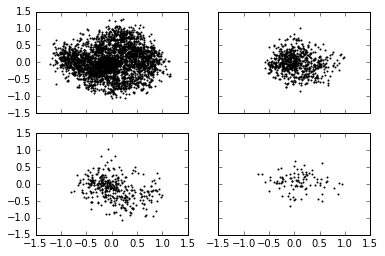

In [16]:
# Run TSNE/PCA on the documents to collapse them into 2 dimensions, for an easy visualisation of patterns.
# Plot the transformed points on a scatter graph with comparison between publications

# tsne = TSNE(n_components=4)
# np.set_printoptions(suppress=True)
# newvectors = tsne.fit_transform(np.round(np.array(model.docvecs),decimals=4))
pca = PCA(n_components=2)
newvectors = pca.fit_transform(np.array(model.docvecs))

"""
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, sharex=True, sharey=True)

for n, ax in enumerate((ax1, ax2, ax3, ax4,ax5, ax6, ax7, ax8)):
    thisdata = newvectors[[i for i in alldata.index if alldata.loc[i]['pubnum'] == n ]]
    ax.scatter(thisdata[:,0], thisdata[:,1], s=1)
"""
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True, sharey=True)
plt.figure(figsize=(20,20))
def topic_plot(axis, topic):
    thisdata = newvectors[[i for i in alldata.index if alldata.loc[i]['tld'] == topic ]]
    axis.scatter(thisdata[:,0], thisdata[:,1], s=1)
for a,t in ((ax1, "dailymail"),(ax2, "telegraph"), (ax3, "theguardian"), (ax4,"time")):
    topic_plot(a,t)


In [114]:
model = doc2vec.Doc2Vec(size=100, window=8, min_count=5, workers=4, iter=20)
model = model.load("datamodel")
model.similar_by_word("Obama")

np.array(model.docvecs).shape

(5358, 100)

In [2]:
"""
def download_publication(url, fileobject, pubnum=-1, filename='data.p', maxarticles=0):
    print("building")
    testpaper = newspaper.build(url, memoize_articles=False)
    print("ok")

    def publication_reader(paper):
        for n, article in enumerate(paper.articles):
            if n<maxarticles or maxarticles==0:
                try:
                    article.download()
                    article.parse()
                    text = article.text
                    words = re.findall(r"[\w']+|[.,/\"!?;]", article.text)
                    docobject = doc2vec.LabeledSentence(words, [article.url])
                    if len(words) > 0:
                        yield [article.url, article.title, article.text, words, docobject]
                except:
                    pass
                    print("Article {} not available: {}".format(n, article.url))
                    
    paper_articles = pd.DataFrame([articledata for articledata in tqdm(publication_reader(testpaper))],
                                  columns = ["url", "title", "text", "words", "docobject"])
    return paper_articles"""

def scrape_publications(urls, filename='data.p', maxarticles=0):
    fileobject=open(filename, 'wb')
    for pubnum, url in enumerate(urls):
        paper_articles = download_publication(url, fileobject, pubnum=pubnum, maxarticles=maxarticles)
        paper_articles['pubnum'] = pubnum

        paper_articles['tld'] = tld
        pickle.dump(paper_articles, fileobject)
    print("Saved")# to {}".format(filename))
    fileobject.close()

In [3]:
def unpickle(filename='data.pkl'):
    f=open(filename, 'rb')
    objs = []
    while 1:
        try:
            objs.append(pickle.load(f))
        except EOFError:
            break
    concatted_df = pd.concat(objs)
    concatted_df.index = list(range(len(concatted_df)))
    return concatted_df

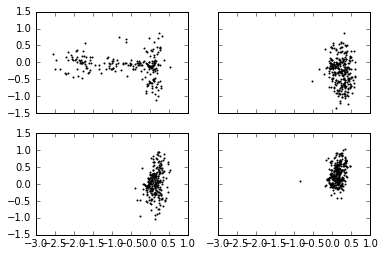

In [18]:
pca = PCA(n_components=2)
newvectors = pca.fit_transform(np.array(model.docvecs))

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True, sharey=True)

for n, ax in enumerate((ax1, ax2, ax3, ax4)):
    thisdata = newvectors[[i for i in alldata.index if alldata.loc[i]['pubnum'] == n ]]
    ax.scatter(thisdata[:,0], thisdata[:,1], s=1)


OK, it's pretty good at grouping by topic. 
* Test this: label data by topic (X.cnn.com maybe?) and cluster.
* Produce a model for topic prediction: linear classifier? SVM?
* Specify down to Politics, see if it can classify by topic (eg American vs UK?)
* Interesting Q: do similar reading ages group together?

## To Do
* Restrict to UK articles only
* Make it easier to download data which adds to existing corpus


## Thoughts about nlp
* Interface between real world and computer world
* Interesting because there are so few data points but it's so damn hard
* Problems which humans could parse easily but now we can do them on millions of data points @ once

In [26]:
alldata.tld.value_counts()

html                 621
theguardian          366
time                  88
foxnews               53
bbc                   25
i                     15
b                      7
u                      5
we                     5
fortune                5
We                     4
Satan                  4
A                      4
2016                   4
basement               4
users                  3
10                     3
suffering              3
horrified              3
run                    3
information            3
price                  3
cars                   3
The                    3
toxic                  3
develop                3
si                     3
says                   3
parents                3
travelandleisure       3
                    ... 
robinson               1
machine                1
hilarious              1
theinformation         1
smooth                 1
us                     1
viewer                 1
secret                 1
tube                   1


In [7]:
# alldata['tld'].value_counts()

In [31]:
alldata = unpickle("data.pkl")
print(alldata["tld"].value_counts())

maildata = alldata[alldata["tld"] == 'dailymail']

maildata['topic'] = [find_topic(url) for url in maildata['url']]
maildata['topic'].value_counts()
maildata.index = range(len(maildata))
docobjects = [doc2vec.LabeledSentence(alldata.loc[i]["words"], [alldata.loc[i]["url"]]) for i in maildata.index]
print("Data loaded.")

model = doc2vec.Doc2Vec(docobjects, size=100, window=8, min_count=5, workers=4, iter=20)
model.save("datamodel")
print("Model trained and saved.")

dailymail      3452
telegraph       855
theguardian     379
time             97
bbc              82
foxnews          53
Name: tld, dtype: int64


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Data loaded.
Model trained and saved.


news            710
video           538
money           391
tvshowbiz       384
sciencetech     360
travel          182
sport           179
femail          170
wires           143
health          140
debate           94
property         83
home             53
                 17
columnists        3
usshowbiz         2
mailonsunday      1
us                1
business          1
Name: topic, dtype: int64


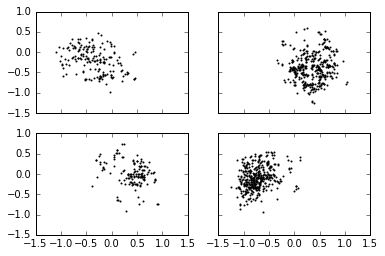

In [42]:
print(maildata['topic'].value_counts())


pca = PCA(n_components=2)
newvectors = pca.fit_transform(np.array(model.docvecs))


f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True, sharey=True)
plt.figure(figsize=(20,20))
def topic_plot(axis, topic):
    thisdata = newvectors[[i for i in maildata.index if maildata.loc[i]['topic'] == topic ]]
    axis.scatter(thisdata[:,0], thisdata[:,1], s=1)
for a,t in ((ax1, "femail"),(ax2, "sciencetech"), (ax3, "health"), (ax4,"tvshowbiz")):
    topic_plot(a,t)

In [38]:
maildata.index = range(len(maildata))